# Introduction 

This code is inspired by the paper called "Model and heuristics for the Assembly Line Worker
Integration and Balancing Problem" by Mayron César O. Moreira, Cristóbal Miralles, Alysson M. Costa

SALBP means: Simple assembly line balancing problem.

This is an heuristic method to find a SALBP-1 solution with a modification to add handicapped workers, using dictionaries and nested dictionaries to represent their compatibility to the tasks needed, that allows for a fast way to compute a solution.

A bit of background: The idea behind the dictionaries as a entry dara type, was that by using the hashing functions and list comprenhension in python is possible to find good and quick results for this problem.

As this is allocation problem in industrial engineering has a complexity of n^2 (meaning the possible space for solutions is nearly limitless) this approach could facilitate nearly optimal solutions. 

This algorithm was tested using different instances and was tested also against the optimal method that was coded using Cplex, in the biggest instance tested the function value of the optimal solution was 18 and this algortithm found a solution using 20 stations (using the same entry data), although there are some optimizations possible I believe is an interesting approach using python to solve complex Industrial Engineering problems.

## Data Explanation

The data used comes from the Assembly Line Balancing website by Scholl more data sets can be found here:https://assembly-line-balancing.de/

All the data used for this algorithm is in the jupyter notebook so it can be easier to visualize as the initial data sets are presented in a different form, I apologise for the huge dictionaries below.

## Summary


[Visual representation of the first data set](#Graph-83-Operations)


[Visual representation of the second data set](#Graph-297-Operations)


[Incomptibilities creation](#Creating-the-incompatibilities-for-the-handicapped-operators)


[Code](#Algorithm-Code)


[Results](#Results)

[Grahic Results](#Graphic-Results)

In [1]:
#libraries to be used 
from collections import Counter
import math
import pandas as pd
import networkx as nx 
import matplotlib.pyplot as plt
import copy

In [2]:
#First Dataset of stations
dic_83 = {2: [1], 3: [2], 4: [2], 5: [2], 6: [3, 4], 7: [4], 8: [5], 9: [6], 10: [6], 11: [7], 12: [9], 13: [10],
          14: [10], 15: [11], 16: [12], 17: [13], 18: [13], 19: [14], 20: [13, 15], 21: [17], 22: [17], 23: [18],
          24: [19], 25: [10], 26: [20], 27: [21, 22], 28: [17, 24], 29: [24],
          30: [29], 31: [30], 32: [25, 28], 33: [32], 34: [32], 35: [32], 36: [32], 37: [33], 38: [36],
          39: [15, 31, 36], 40: [37], 41: [38], 42: [39], 43: [39], 44: [39], 45: [41], 46: [44], 47: [45], 48: [46],
          49: [47], 50: [48], 51: [50], 52: [51], 53: [52], 54: [53], 55: [54], 56: [55], 57: [56], 58: [57], 59: [58],
          60: [59], 61: [60], 62: [61], 63: [62], 64: [63], 65: [64], 66: [65],
          67: [66], 68: [67], 69: [27, 49], 70: [69], 71: [69], 72: [70], 73: [71, 72], 74: [23, 26, 68, 73],
          75: [39, 68, 73], 76: [74, 75], 77: [8, 16, 34, 35, 40, 42, 43, 76],
          78: [8, 16, 34, 35, 40, 42, 43, 76], 79: [77, 78], 80: [79], 81: [79], 82: [80], 83: [81, 82, 83]}
#I will add this same dictionary to another variable because the algorithm modifies the initial dicitionary 
copy_83_dic = copy.deepcopy(dic_83)

In [3]:
#Auxiliary function to visually represent the data using a graph
def graph_generator(dictionary):
    #Using a directed graph representation from nx library
    G = nx.DiGraph(dictionary)
    pos = nx.kamada_kawai_layout(G)
    fig, ax = plt.subplots(figsize=(15, 15))
    nx.draw_networkx(G, pos=pos, with_labels=True, node_color='lightblue', node_size=250, font_size=10, arrowsize=10)
    plt.show()

## Graph 83 Operations

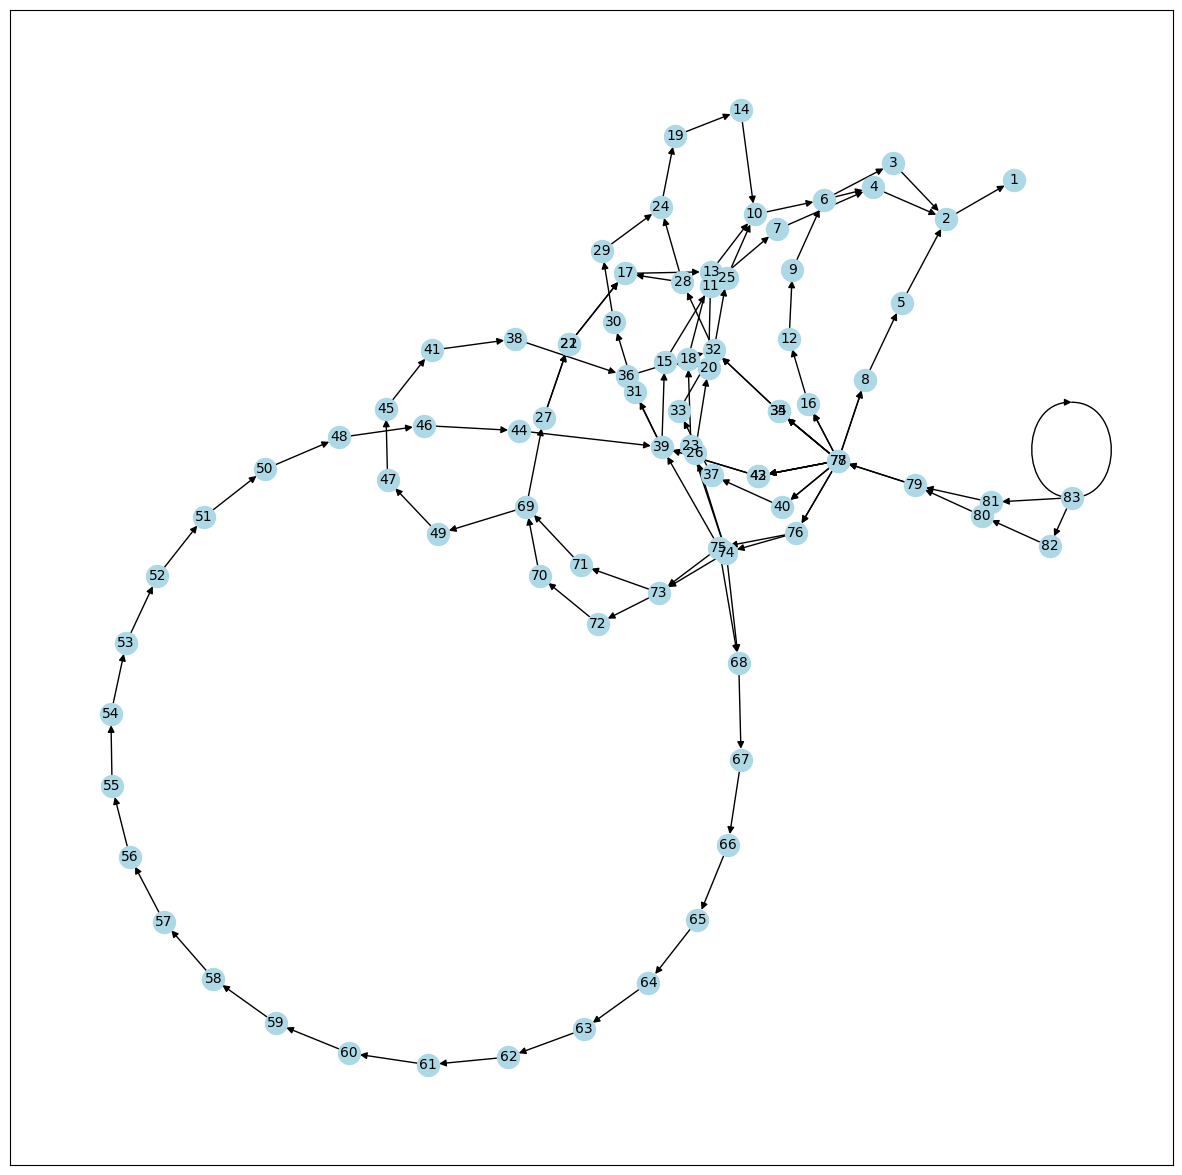

In [4]:
graph_generator(dic_83)

In [5]:
#Second data test stations
dict_297 = {2: [1],
            3: [2],
            4: [3],
            5: [4],
            22: [4],
            26: [4],
            27: [4],
            40: [4],
            48: [4],
            56: [4],
            83: [4],
            86: [4],
            94: [4],
            105: [4],
            109: [4],
            111: [4],
            134: [4],
            221: [4],
            247: [4],
            259: [4],
            6: [5],
            7: [6],
            8: [6],
            9: [6],
            10: [6],
            11: [7, 8, 9, 10],
            13: [7, 8, 9, 10],
            14: [7, 8, 9, 10],
            15: [7, 8, 9, 10],
            20: [7, 8, 9, 10],
            12: [7, 8, 9, 10],
            16: [11],
            17: [12],
            18: [13],
            19: [14],
            21: [15],
            23: [16, 17, 18, 19, 20, 21],
            24: [22],
            25: [22],
            28: [23],
            29: [24, 25],
            30: [26],
            31: [27],
            32: [28],
            37: [28],
            33: [29],
            44: [29, 40],
            121: [29],
            34: [30, 31],
            297: [30, 297],
            82: [31],
            172: [31],
            179: [31],
            36: [32],
            38: [33],
            35: [34],
            42: [35],
            39: [36, 37],
            41: [38],
            43: [39],
            84: [40, 73, 75, 76, 77],
            97: [40, 73, 74, 75, 76, 77],
            45: [41],
            46: [42],
            47: [43],
            49: [44],
            50: [45],
            51: [46],
            138: [46],
            52: [47, 48],
            53: [49],
            54: [50],
            55: [51],
            81: [51],
            57: [52],
            58: [53, 54],
            296: [54, 296],
            59: [55],
            60: [56],
            61: [56],
            62: [57],
            63: [57],
            71: [57],
            76: [57],
            64: [58, 59],
            99: [59, 87, 88, 89],
            100: [59, 87, 88, 89],
            68: [60],
            65: [61],
            66: [62],
            67: [63],
            72: [64],
            69: [65, 66],
            70: [67],
            73: [68],
            74: [69],
            75: [70],
            77: [71],
            78: [72],
            79: [78],
            80: [78],
            125: [78],
            192: [78],
            85: [79, 80],
            87: [81],
            88: [82],
            89: [82],
            90: [83],
            91: [84],
            92: [85],
            93: [86],
            95: [90],
            96: [91],
            98: [92, 93],
            101: [94, 95, 96, 97],
            102: [98],
            103: [99],
            104: [100],
            106: [101],
            107: [102],
            108: [103, 104],
            110: [105],
            112: [106],
            113: [107],
            114: [108],
            115: [108],
            292: [108],
            119: [109, 110, 114],
            120: [109, 110, 115],
            162: [110],
            116: [111],
            117: [112],
            118: [113],
            122: [116],
            123: [117],
            124: [117],
            257: [117],
            126: [118],
            127: [119, 120],
            150: [120],
            128: [121],
            129: [122],
            130: [123, 124, 125, 126, 127, 128, 129],
            145: [123],
            146: [123],
            147: [123],
            148: [123],
            149: [123],
            157: [127],
            141: [129],
            131: [130],
            144: [130],
            132: [131],
            133: [131],
            135: [132, 133],
            170: [133, 166],
            136: [134],
            137: [135],
            139: [136],
            140: [137, 128],
            191: [138],
            142: [139],
            253: [139],
            143: [140],
            200: [140, 191],
            151: [141],
            152: [142],
            153: [143],
            169: [143],
            154: [144],
            155: [145],
            156: [146],
            158: [147],
            159: [148],
            160: [149],
            161: [150],
            163: [151],
            164: [152],
            165: [153],
            166: [154, 155, 156, 157, 158, 159, 160, 161, 163],
            167: [162, 164],
            168: [165],
            176: [165],
            171: [167],
            173: [168],
            174: [169, 170, 171],
            175: [172],
            177: [173],
            178: [174],
            287: [174],
            288: [174],
            180: [175],
            181: [176, 177, 178, 179, 180],
            252: [180],
            182: [181],
            183: [181],
            184: [181],
            185: [181],
            186: [181],
            187: [181],
            188: [181],
            189: [181],
            196: [181],
            197: [181],
            295: [181, 295],
            190: [182],
            193: [183],
            194: [184],
            195: [185, 186, 187, 188, 189, 190],
            201: [192],
            198: [193],
            199: [194, 195],
            203: [195],
            205: [195],
            227: [195, 225],
            229: [195],
            202: [196, 197, 198, 199, 200, 201],
            204: [202],
            251: [202],
            206: [203],
            208: [203],
            207: [204, 205],
            250: [204],
            209: [206],
            210: [207, 208, 209],
            212: [207],
            211: [209],
            213: [210, 211],
            214: [212, 213],
            215: [214],
            234: [214],
            216: [215],
            217: [216],
            218: [217],
            219: [218],
            220: [219],
            222: [220],
            223: [221],
            224: [222],
            225: [223],
            226: [224],
            228: [226],
            230: [227],
            231: [228],
            235: [229],
            236: [229, 232],
            232: [230],
            271: [230, 264, 266],
            289: [230],
            233: [231],
            237: [233, 235],
            238: [234],
            256: [234, 250, 251],
            239: [236],
            240: [237, 238, 239],
            285: [238],
            279: [239],
            241: [240],
            243: [240],
            242: [241],
            244: [242],
            245: [243, 244],
            246: [243, 244],
            255: [244],
            248: [245, 246],
            278: [247, 274],
            249: [248],
            254: [249],
            284: [249],
            258: [252],
            260: [253],
            261: [254, 255],
            262: [255],
            263: [256],
            264: [257],
            265: [258],
            266: [259],
            267: [260],
            268: [261],
            269: [261, 262],
            270: [263],
            272: [265],
            273: [267],
            274: [268, 269, 270, 271],
            275: [272],
            276: [273],
            277: [274],
            282: [274],
            280: [275],
            281: [276],
            283: [277, 278],
            286: [279],
            290: [280],
            291: [281],
            293: [282, 283, 287, 288, 290, 291, 292, 293],
            294: [284, 285, 286, 289, 292, 294],
            }
#Creating a copy of the dictonary for results purposes
copy_297_dic = copy.deepcopy(dict_297)

## Graph 297 Operations 

[Back to the summary](#Summary)

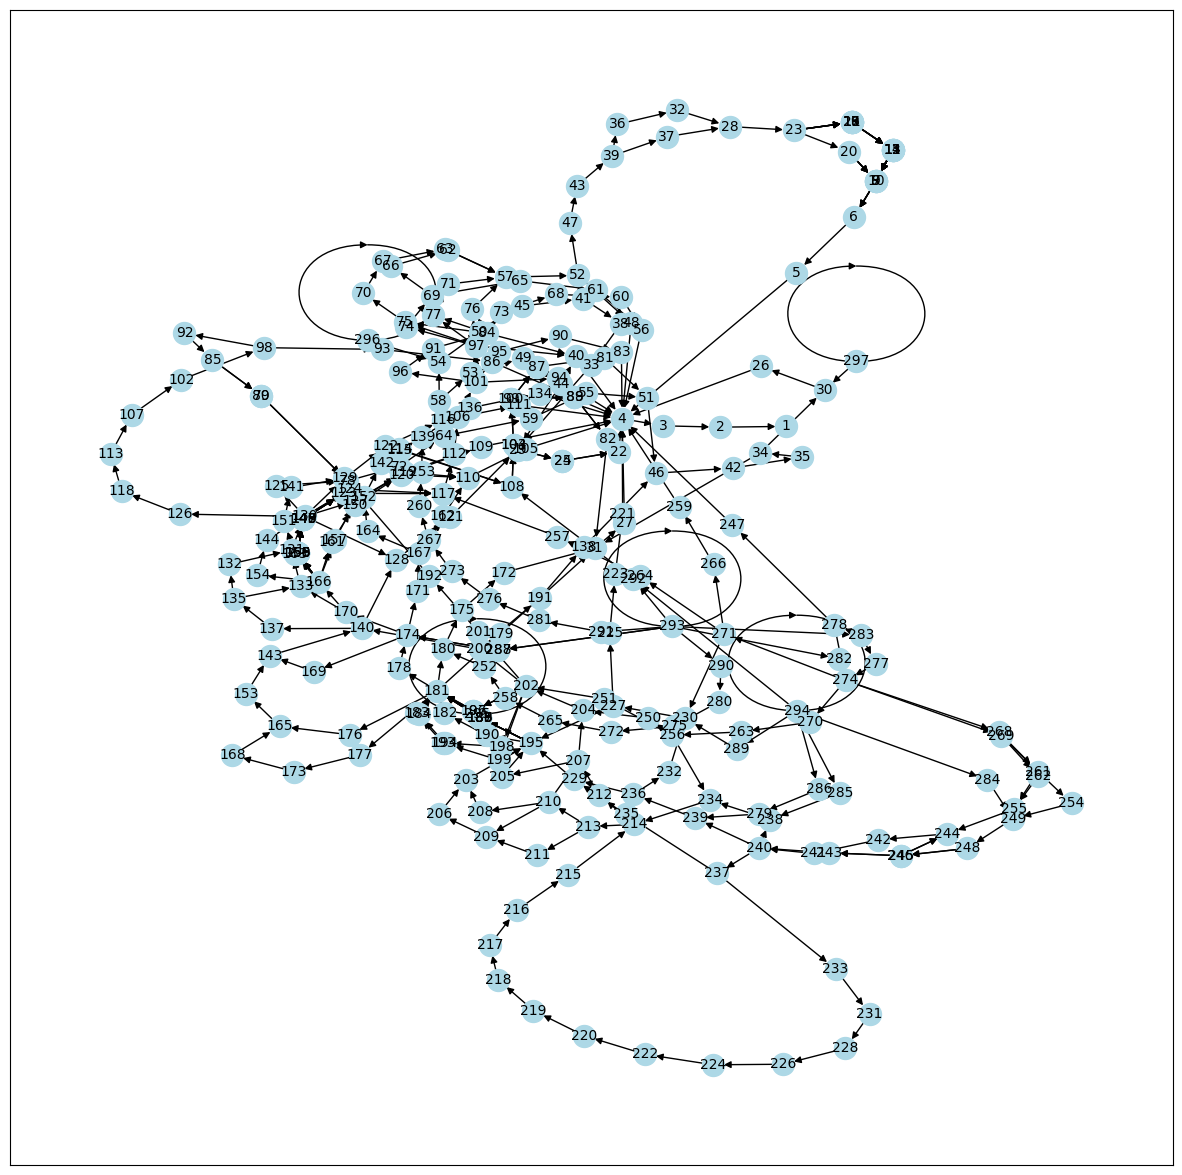

In [6]:
#Creating the graph for the 297 operations problem 
#The visualisation is not optimal but it can help understanding the complexity of this problem when the amount of operations increases 
graph_generator(dict_297)

In [7]:
#Time data for the stations 
# TIME OF THE OPERATIONS
# add a 0 in the first position of the list in order to use list comprehension later on and save some time
time_83 = [0, 1673,
           985,
           1836,
           973,
           1700,
           2881,
           2231,
           1040,
           1793,
           1250,
           700,
           464,
           500,
           1133,
           577,
           483,
           880,
           667,
           600,
           233,
           408,
           847,
           767,
           850,
           780,
           912,
           748,
           1863,
           714,
           1004,
           713,
           642,
           629,
           1234,
           1143,
           1266,
           792,
           1251,
           1310,
           663,
           494,
           1288,
           792,
           578,
           594,
           578,
           622,
           578,
           564,
           578,
           578,
           578,
           578,
           578,
           578,
           578,
           578,
           578,
           578,
           578,
           578,
           578,
           578,
           578,
           578,
           578,
           578,
           578,
           467,
           887,
           396,
           1296,
           1100,
           2543,
           764,
           357,
           701,
           1164,
           286,
           2100,
           450,
           1300,
           3691,
           ]
times_297 = [0, 270,
             270,
             130,
             148,
             190,
             293,
             348,
             182,
             490,
             212,
             248,
             248,
             248,
             248,
             248,
             268,
             268,
             268,
             288,
             248,
             268,
             60,
             268,
             240,
             240,
             171,
             490,
             182,
             170,
             306,
             108,
             248,
             190,
             240,
             339,
             288,
             248,
             455,
             268,
             270,
             180,
             121,
             270,
             440,
             249,
             194,
             162,
             130,
             388,
             90,
             212,
             246,
             188,
             270,
             160,
             79,
             466,
             240,
             137,
             184,
             110,
             275,
             149,
             280,
             119,
             184,
             140,
             150,
             190,
             150,
             150,
             284,
             192,
             347,
             232,
             140,
             608,
             80,
             40,
             130,
             110,
             350,
             140,
             240,
             240,
             90,
             54,
             294,
             203,
             150,
             270,
             155,
             190,
             78,
             140,
             241,
             430,
             90,
             110,
             9,
             430,
             130,
             289,
             110,
             160,
             442,
             159,
             250,
             190,
             184,
             690,
             72,
             190,
             190,
             90,
             889,
             170,
             155,
             190,
             130,
             390,
             301,
             54,
             227,
             142,
             184,
             741,
             868,
             230,
             121,
             320,
             126,
             440,
             127,
             134,
             150,
             140,
             110,
             320,
             250,
             232,
             188,
             250,
             377,
             90,
             140,
             90,
             90,
             70,
             90,
             110,
             150,
             101,
             377,
             118,
             290,
             209,
             150,
             150,
             79,
             150,
             91,
             59,
             218,
             351,
             873,
             130,
             68,
             126,
             120,
             227,
             198,
             132,
             121,
             150,
             100,
             38,
             70,
             355,
             284,
             122,
             75,
             160,
             140,
             520,
             99,
             182,
             80,
             514,
             96,
             50,
             272,
             226,
             194,
             164,
             96,
             107,
             108,
             167,
             98,
             82,
             482,
             72,
             50,
             130,
             230,
             50,
             240,
             190,
             190,
             240,
             74,
             139,
             339,
             260,
             132,
             550,
             420,
             152,
             12,
             90,
             5,
             128,
             100,
             120,
             100,
             320,
             835,
             740,
             223,
             100,
             390,
             140,
             304,
             120,
             403,
             21,
             246,
             160,
             1019,
             34,
             120,
             68,
             910,
             302,
             778,
             101,
             1310,
             20,
             278,
             81,
             290,
             100,
             372,
             72,
             28,
             90,
             250,
             144,
             303,
             220,
             58,
             224,
             211,
             99,
             44,
             120,
             70,
             421,
             231,
             214,
             196,
             280,
             398,
             72,
             280,
             356,
             193,
             140,
             130,
             300,
             456,
             7,
             170,
             252,
             210,
             308,
             308,
             121,
             52,
             426,
             104,
             1386,
             527,
             968,
             1047,
             538,
             ]

In [8]:
# LIST COMPREHENSION TO CREATE THE TIMES DICTIONARIES #
dic_times_83 = {i: time_83[i] for i in range(1, len(time_83))}
dic_times_297 = {i: times_297[i] for i in range(1, len(times_297))}


#  DATA FOR THE OPERATIONS
oper_num_83 = 83  # change this value according to the problem in this case values are already pre-established
oper_num_297 = 297

# DISABLED OPERATORS DATA- TIMES DICTIONARIES
# disability factor (chosen by user)
dis_fact = 1.1

# use list comprehension to generate the times for the hand_op
# generate the dict of times for the operator
dis_time_83 = [i * dis_fact for i in time_83]
dis_time_dic_83 = {i: dis_time_83[i] for i in range(1, len(time_83))}
dis_time_297 = [i * dis_fact for i in times_297]
dis_time_dic_297 = {i: dis_time_297[i] for i in range(1, len(times_297))}
h_num_op = 1  # this value is used to consider only 1 operator at a time


# COMPARATOR OF AVAILABILITY
# generate a list of 1 used to compare the incompatibilities vector
list_ones = [1] * (oper_num_83 + 1)  
operat_dict = {x: list_ones[x] for x in
               range(1, len(list_ones))}
#Next dataset 
list_ones_1 = [1] * (oper_num_297 + 1)  
operat_dict_1 = {x: list_ones_1[x] for x in range(1, len(list_ones_1))}  


## Creating the incompatibilities for the handicapped operators

[Back to the summary](#Summary)

In [9]:
# TASKS POSSIBLES FOR THE HANDICAPPED OPERATORS #USE NESTED DICTIONARIES

#The assumption is that the handicapped operators can only work/use in a determined number of stations.
#the values were randomly selected
h_gen_83 = {
    1: {1: 1, 2: 0, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 0, 13: 1, 14: 1, 15: 0, 16: 1, 17: 1,
        18: 1, 19: 1, 20: 1, 21: 1, 22: 1, 23: 1, 24: 1, 25: 1, 26: 1, 27: 1, 28: 1, 29: 1, 30: 1, 31: 1, 32: 1, 33: 1,
        34: 1, 35: 1, 36: 0, 37: 1, 38: 1, 39: 1, 40: 1,
        41: 1, 42: 1, 43: 1, 44: 1, 45: 1, 46: 1, 47: 1, 48: 1, 49: 1, 50: 1, 51: 1, 52: 1, 53: 1, 54: 0, 55: 1, 56: 1,
        57: 1, 58: 1, 59: 1, 60: 1, 61: 1, 62: 1,
        63: 1, 64: 1, 65: 1, 66: 1, 67: 1, 68: 1, 69: 1, 70: 1, 71: 1, 72: 1, 73: 1, 74: 1, 75: 1, 76: 1, 77: 1, 78: 1,
        79: 1, 80: 1, 81: 1, 82: 1, 83: 1},
    2: {1: 1, 2: 0, 3: 1, 4: 1, 5: 0, 6: 0, 7: 1, 8: 1, 9: 1, 10: 1, 11: 0, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1,
        18: 1, 19: 1, 20: 1, 21: 1, 22: 1, 23: 1, 24: 1, 25: 1, 26: 1, 27: 1, 28: 1, 29: 1, 30: 1, 31: 1, 32: 1, 33: 1,
        34: 0, 35: 1, 36: 1, 37: 1, 38: 1, 39: 1, 40: 1,
        41: 1, 42: 1, 43: 1, 44: 1, 45: 1, 46: 1, 47: 1, 48: 1, 49: 1, 50: 1, 51: 1, 52: 1, 53: 1, 54: 1, 55: 1, 56: 1,
        57: 1, 58: 1, 59: 1, 60: 1, 61: 1, 62: 1,
        63: 1, 64: 1, 65: 1, 66: 1, 67: 1, 68: 1, 69: 0, 70: 1, 71: 1, 72: 1, 73: 1, 74: 1, 75: 1, 76: 1, 77: 0, 78: 1,
        79: 1, 80: 1, 81: 1, 82: 0, 83: 1},
    3: {1: 1, 2: 1, 3: 1, 4: 0, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 0, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1,
        18: 1, 19: 1, 20: 1, 21: 1, 22: 1, 23: 1, 24: 1, 25: 1, 26: 1, 27: 1, 28: 1, 29: 1, 30: 1, 31: 0, 32: 1, 33: 1,
        34: 1, 35: 1, 36: 1, 37: 1, 38: 1, 39: 0, 40: 1,
        41: 1, 42: 1, 43: 1, 44: 1, 45: 1, 46: 1, 47: 1, 48: 1, 49: 1, 50: 1, 51: 1, 52: 1, 53: 1, 54: 1, 55: 1, 56: 1,
        57: 1, 58: 1, 59: 1, 60: 1, 61: 1, 62: 1,
        63: 0, 64: 1, 65: 1, 66: 1, 67: 1, 68: 1, 69: 1, 70: 1, 71: 1, 72: 1, 73: 1, 74: 1, 75: 1, 76: 1, 77: 1, 78: 1,
        79: 1, 80: 1, 81: 1, 82: 0, 83: 1},
    4: {1: 1, 2: 0, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 0, 17: 1,
        18: 1, 19: 1, 20: 1, 21: 1, 22: 1, 23: 1, 24: 1, 25: 1, 26: 1, 27: 1, 28: 1, 29: 1, 30: 1, 31: 1, 32: 1, 33: 1,
        34: 1, 35: 1, 36: 1, 37: 1, 38: 1, 39: 1, 40: 1,
        41: 1, 42: 1, 43: 1, 44: 1, 45: 0, 46: 1, 47: 1, 48: 1, 49: 1, 50: 1, 51: 1, 52: 1, 53: 1, 54: 1, 55: 1, 56: 1,
        57: 1, 58: 1, 59: 1, 60: 1, 61: 1, 62: 1,
        63: 1, 64: 1, 65: 1, 66: 1, 67: 1, 68: 1, 69: 1, 70: 1, 71: 1, 72: 1, 73: 1, 74: 1, 75: 1, 76: 1, 77: 0, 78: 1,
        79: 1, 80: 0, 81: 1, 82: 0, 83: 1}}
h_gen_297 = {1: {1: 1,
                 2: 1,
                 3: 1,
                 4: 1,
                 5: 1,
                 6: 1,
                 7: 1,
                 8: 1,
                 9: 1,
                 10: 1,
                 11: 1,
                 12: 1,
                 13: 1,
                 14: 1,
                 15: 1,
                 16: 1,
                 17: 1,
                 18: 1,
                 19: 1,
                 20: 1,
                 21: 1,
                 22: 1,
                 23: 1,
                 24: 1,
                 25: 1,
                 26: 0,
                 27: 1,
                 28: 1,
                 29: 1,
                 30: 1,
                 31: 1,
                 32: 1,
                 33: 1,
                 34: 1,
                 35: 1,
                 36: 1,
                 37: 1,
                 38: 1,
                 39: 1,
                 40: 1,
                 41: 1,
                 42: 1,
                 43: 1,
                 44: 1,
                 45: 1,
                 46: 1,
                 47: 1,
                 48: 1,
                 49: 1,
                 50: 1,
                 51: 1,
                 52: 1,
                 53: 1,
                 54: 1,
                 55: 1,
                 56: 1,
                 57: 1,
                 58: 1,
                 59: 1,
                 60: 1,
                 61: 1,
                 62: 1,
                 63: 1,
                 64: 1,
                 65: 1,
                 66: 1,
                 67: 1,
                 68: 1,
                 69: 1,
                 70: 1,
                 71: 1,
                 72: 1,
                 73: 1,
                 74: 1,
                 75: 1,
                 76: 1,
                 77: 1,
                 78: 1,
                 79: 1,
                 80: 1,
                 81: 1,
                 82: 1,
                 83: 1,
                 84: 1,
                 85: 1,
                 86: 1,
                 87: 1,
                 88: 1,
                 89: 1,
                 90: 1,
                 91: 1,
                 92: 1,
                 93: 1,
                 94: 1,
                 95: 1,
                 96: 1,
                 97: 1,
                 98: 1,
                 99: 1,
                 100: 1,
                 101: 1,
                 102: 1,
                 103: 1,
                 104: 1,
                 105: 1,
                 106: 1,
                 107: 1,
                 108: 1,
                 109: 1,
                 110: 1,
                 111: 1,
                 112: 1,
                 113: 1,
                 114: 1,
                 115: 1,
                 116: 1,
                 117: 1,
                 118: 1,
                 119: 1,
                 120: 1,
                 121: 1,
                 122: 1,
                 123: 1,
                 124: 1,
                 125: 1,
                 126: 1,
                 127: 1,
                 128: 1,
                 129: 1,
                 130: 1,
                 131: 1,
                 132: 1,
                 133: 1,
                 134: 1,
                 135: 1,
                 136: 1,
                 137: 1,
                 138: 1,
                 139: 1,
                 140: 1,
                 141: 1,
                 142: 1,
                 143: 1,
                 144: 1,
                 145: 1,
                 146: 1,
                 147: 1,
                 148: 1,
                 149: 1,
                 150: 1,
                 151: 1,
                 152: 1,
                 153: 1,
                 154: 1,
                 155: 1,
                 156: 1,
                 157: 1,
                 158: 1,
                 159: 1,
                 160: 1,
                 161: 1,
                 162: 1,
                 163: 1,
                 164: 1,
                 165: 1,
                 166: 1,
                 167: 1,
                 168: 1,
                 169: 1,
                 170: 1,
                 171: 1,
                 172: 1,
                 173: 1,
                 174: 1,
                 175: 1,
                 176: 1,
                 177: 1,
                 178: 1,
                 179: 1,
                 180: 1,
                 181: 1,
                 182: 1,
                 183: 1,
                 184: 1,
                 185: 1,
                 186: 1,
                 187: 1,
                 188: 1,
                 189: 1,
                 190: 1,
                 191: 1,
                 192: 1,
                 193: 1,
                 194: 1,
                 195: 1,
                 196: 1,
                 197: 1,
                 198: 1,
                 199: 1,
                 200: 1,
                 201: 1,
                 202: 1,
                 203: 1,
                 204: 1,
                 205: 1,
                 206: 1,
                 207: 1,
                 208: 1,
                 209: 1,
                 210: 1,
                 211: 1,
                 212: 1,
                 213: 1,
                 214: 1,
                 215: 1,
                 216: 1,
                 217: 1,
                 218: 1,
                 219: 1,
                 220: 1,
                 221: 1,
                 222: 1,
                 223: 1,
                 224: 1,
                 225: 1,
                 226: 1,
                 227: 1,
                 228: 1,
                 229: 1,
                 230: 1,
                 231: 1,
                 232: 1,
                 233: 1,
                 234: 1,
                 235: 1,
                 236: 1,
                 237: 1,
                 238: 1,
                 239: 1,
                 240: 1,
                 241: 1,
                 242: 1,
                 243: 1,
                 244: 1,
                 245: 1,
                 246: 1,
                 247: 1,
                 248: 1,
                 249: 1,
                 250: 1,
                 251: 1,
                 252: 1,
                 253: 1,
                 254: 1,
                 255: 1,
                 256: 1,
                 257: 1,
                 258: 1,
                 259: 1,
                 260: 1,
                 261: 1,
                 262: 1,
                 263: 1,
                 264: 1,
                 265: 1,
                 266: 1,
                 267: 1,
                 268: 1,
                 269: 1,
                 270: 1,
                 271: 1,
                 272: 1,
                 273: 1,
                 274: 1,
                 275: 1,
                 276: 1,
                 277: 1,
                 278: 1,
                 279: 1,
                 280: 1,
                 281: 1,
                 282: 1,
                 283: 1,
                 284: 1,
                 285: 1,
                 286: 1,
                 287: 1,
                 288: 1,
                 289: 1,
                 290: 1,
                 291: 1,
                 292: 1,
                 293: 1,
                 294: 1,
                 295: 1,
                 296: 1,
                 297: 1}}
h_gen_297_2 = {1: {1: 1,
                   2: 0,
                   3: 1,
                   4: 1,
                   5: 1,
                   6: 1,
                   7: 1,
                   8: 1,
                   9: 1,
                   10: 1,
                   11: 1,
                   12: 1,
                   13: 0,
                   14: 1,
                   15: 1,
                   16: 1,
                   17: 1,
                   18: 1,
                   19: 1,
                   20: 1,
                   21: 1,
                   22: 1,
                   23: 1,
                   24: 0,
                   25: 1,
                   26: 1,
                   27: 1,
                   28: 1,
                   29: 1,
                   30: 1,
                   31: 1,
                   32: 1,
                   33: 1,
                   34: 1,
                   35: 1,
                   36: 1,
                   37: 1,
                   38: 1,
                   39: 1,
                   40: 1,
                   41: 1,
                   42: 1,
                   43: 1,
                   44: 1,
                   45: 1,
                   46: 1,
                   47: 1,
                   48: 1,
                   49: 1,
                   50: 1,
                   51: 0,
                   52: 1,
                   53: 1,
                   54: 1,
                   55: 1,
                   56: 1,
                   57: 1,
                   58: 1,
                   59: 1,
                   60: 1,
                   61: 1,
                   62: 1,
                   63: 1,
                   64: 1,
                   65: 1,
                   66: 1,
                   67: 1,
                   68: 1,
                   69: 1,
                   70: 1,
                   71: 1,
                   72: 1,
                   73: 1,
                   74: 1,
                   75: 1,
                   76: 0,
                   77: 1,
                   78: 1,
                   79: 1,
                   80: 1,
                   81: 1,
                   82: 1,
                   83: 1,
                   84: 1,
                   85: 1,
                   86: 1,
                   87: 1,
                   88: 1,
                   89: 1,
                   90: 1,
                   91: 1,
                   92: 1,
                   93: 1,
                   94: 1,
                   95: 1,
                   96: 1,
                   97: 1,
                   98: 1,
                   99: 0,
                   100: 1,
                   101: 1,
                   102: 1,
                   103: 1,
                   104: 1,
                   105: 1,
                   106: 1,
                   107: 1,
                   108: 1,
                   109: 1,
                   110: 1,
                   111: 1,
                   112: 1,
                   113: 1,
                   114: 1,
                   115: 1,
                   116: 1,
                   117: 1,
                   118: 1,
                   119: 0,
                   120: 1,
                   121: 1,
                   122: 1,
                   123: 1,
                   124: 1,
                   125: 1,
                   126: 1,
                   127: 1,
                   128: 1,
                   129: 1,
                   130: 1,
                   131: 1,
                   132: 1,
                   133: 1,
                   134: 1,
                   135: 0,
                   136: 1,
                   137: 1,
                   138: 1,
                   139: 1,
                   140: 1,
                   141: 1,
                   142: 1,
                   143: 1,
                   144: 1,
                   145: 1,
                   146: 1,
                   147: 1,
                   148: 1,
                   149: 1,
                   150: 1,
                   151: 1,
                   152: 1,
                   153: 0,
                   154: 1,
                   155: 1,
                   156: 1,
                   157: 1,
                   158: 1,
                   159: 1,
                   160: 1,
                   161: 1,
                   162: 1,
                   163: 1,
                   164: 1,
                   165: 1,
                   166: 1,
                   167: 1,
                   168: 1,
                   169: 1,
                   170: 1,
                   171: 1,
                   172: 1,
                   173: 1,
                   174: 1,
                   175: 1,
                   176: 1,
                   177: 1,
                   178: 1,
                   179: 1,
                   180: 1,
                   181: 1,
                   182: 1,
                   183: 1,
                   184: 1,
                   185: 1,
                   186: 1,
                   187: 1,
                   188: 1,
                   189: 1,
                   190: 1,
                   191: 1,
                   192: 0,
                   193: 1,
                   194: 1,
                   195: 1,
                   196: 1,
                   197: 1,
                   198: 1,
                   199: 1,
                   200: 1,
                   201: 1,
                   202: 1,
                   203: 1,
                   204: 1,
                   205: 1,
                   206: 1,
                   207: 1,
                   208: 1,
                   209: 1,
                   210: 1,
                   211: 1,
                   212: 0,
                   213: 1,
                   214: 1,
                   215: 1,
                   216: 1,
                   217: 1,
                   218: 1,
                   219: 1,
                   220: 1,
                   221: 1,
                   222: 1,
                   223: 1,
                   224: 1,
                   225: 1,
                   226: 1,
                   227: 1,
                   228: 1,
                   229: 1,
                   230: 1,
                   231: 1,
                   232: 1,
                   233: 1,
                   234: 0,
                   235: 1,
                   236: 1,
                   237: 1,
                   238: 1,
                   239: 1,
                   240: 1,
                   241: 1,
                   242: 1,
                   243: 1,
                   244: 1,
                   245: 1,
                   246: 1,
                   247: 1,
                   248: 1,
                   249: 1,
                   250: 1,
                   251: 1,
                   252: 1,
                   253: 1,
                   254: 1,
                   255: 1,
                   256: 1,
                   257: 1,
                   258: 0,
                   259: 1,
                   260: 1,
                   261: 1,
                   262: 1,
                   263: 1,
                   264: 1,
                   265: 1,
                   266: 1,
                   267: 1,
                   268: 1,
                   269: 1,
                   270: 1,
                   271: 1,
                   272: 1,
                   273: 1,
                   274: 1,
                   275: 1,
                   276: 1,
                   277: 1,
                   278: 1,
                   279: 1,
                   280: 1,
                   281: 1,
                   282: 1,
                   283: 1,
                   284: 1,
                   285: 1,
                   286: 1,
                   287: 1,
                   288: 0,
                   289: 1,
                   290: 1,
                   291: 1,
                   292: 1,
                   293: 0,
                   294: 0,
                   295: 1,
                   296: 1,
                   297: 1},
               2: {1: 1,
                   2: 1,
                   3: 1,
                   4: 1,
                   5: 1,
                   6: 1,
                   7: 1,
                   8: 1,
                   9: 1,
                   10: 1,
                   11: 1,
                   12: 1,
                   13: 1,
                   14: 0,
                   15: 1,
                   16: 1,
                   17: 1,
                   18: 1,
                   19: 1,
                   20: 1,
                   21: 1,
                   22: 1,
                   23: 1,
                   24: 1,
                   25: 1,
                   26: 1,
                   27: 1,
                   28: 1,
                   29: 1,
                   30: 1,
                   31: 1,
                   32: 1,
                   33: 1,
                   34: 1,
                   35: 1,
                   36: 1,
                   37: 1,
                   38: 0,
                   39: 1,
                   40: 1,
                   41: 1,
                   42: 1,
                   43: 1,
                   44: 1,
                   45: 1,
                   46: 1,
                   47: 1,
                   48: 1,
                   49: 1,
                   50: 1,
                   51: 1,
                   52: 1,
                   53: 1,
                   54: 1,
                   55: 1,
                   56: 1,
                   57: 1,
                   58: 1,
                   59: 1,
                   60: 0,
                   61: 1,
                   62: 1,
                   63: 1,
                   64: 1,
                   65: 1,
                   66: 1,
                   67: 1,
                   68: 1,
                   69: 1,
                   70: 1,
                   71: 1,
                   72: 1,
                   73: 1,
                   74: 1,
                   75: 1,
                   76: 1,
                   77: 1,
                   78: 1,
                   79: 1,
                   80: 0,
                   81: 1,
                   82: 1,
                   83: 1,
                   84: 1,
                   85: 1,
                   86: 1,
                   87: 1,
                   88: 1,
                   89: 1,
                   90: 1,
                   91: 1,
                   92: 1,
                   93: 1,
                   94: 1,
                   95: 1,
                   96: 1,
                   97: 0,
                   98: 1,
                   99: 1,
                   100: 1,
                   101: 0,
                   102: 1,
                   103: 1,
                   104: 1,
                   105: 1,
                   106: 1,
                   107: 1,
                   108: 1,
                   109: 1,
                   110: 1,
                   111: 1,
                   112: 1,
                   113: 1,
                   114: 1,
                   115: 1,
                   116: 1,
                   117: 1,
                   118: 1,
                   119: 1,
                   120: 1,
                   121: 1,
                   122: 1,
                   123: 1,
                   124: 1,
                   125: 1,
                   126: 1,
                   127: 1,
                   128: 0,
                   129: 1,
                   130: 1,
                   131: 1,
                   132: 1,
                   133: 1,
                   134: 1,
                   135: 1,
                   136: 1,
                   137: 1,
                   138: 0,
                   139: 1,
                   140: 1,
                   141: 1,
                   142: 1,
                   143: 1,
                   144: 1,
                   145: 1,
                   146: 1,
                   147: 1,
                   148: 1,
                   149: 1,
                   150: 1,
                   151: 1,
                   152: 1,
                   153: 1,
                   154: 0,
                   155: 1,
                   156: 1,
                   157: 1,
                   158: 1,
                   159: 1,
                   160: 1,
                   161: 1,
                   162: 1,
                   163: 1,
                   164: 1,
                   165: 1,
                   166: 1,
                   167: 1,
                   168: 1,
                   169: 1,
                   170: 1,
                   171: 1,
                   172: 1,
                   173: 1,
                   174: 1,
                   175: 1,
                   176: 1,
                   177: 1,
                   178: 1,
                   179: 0,
                   180: 1,
                   181: 1,
                   182: 1,
                   183: 1,
                   184: 1,
                   185: 1,
                   186: 1,
                   187: 1,
                   188: 1,
                   189: 1,
                   190: 1,
                   191: 1,
                   192: 1,
                   193: 1,
                   194: 1,
                   195: 1,
                   196: 1,
                   197: 0,
                   198: 1,
                   199: 1,
                   200: 1,
                   201: 1,
                   202: 1,
                   203: 1,
                   204: 1,
                   205: 1,
                   206: 1,
                   207: 1,
                   208: 1,
                   209: 1,
                   210: 1,
                   211: 1,
                   212: 1,
                   213: 1,
                   214: 0,
                   215: 1,
                   216: 1,
                   217: 1,
                   218: 1,
                   219: 1,
                   220: 1,
                   221: 1,
                   222: 1,
                   223: 1,
                   224: 1,
                   225: 1,
                   226: 1,
                   227: 1,
                   228: 1,
                   229: 1,
                   230: 1,
                   231: 0,
                   232: 1,
                   233: 1,
                   234: 1,
                   235: 1,
                   236: 1,
                   237: 1,
                   238: 1,
                   239: 1,
                   240: 1,
                   241: 1,
                   242: 1,
                   243: 1,
                   244: 1,
                   245: 1,
                   246: 1,
                   247: 1,
                   248: 1,
                   249: 1,
                   250: 1,
                   251: 1,
                   252: 1,
                   253: 1,
                   254: 1,
                   255: 1,
                   256: 1,
                   257: 1,
                   258: 1,
                   259: 1,
                   260: 1,
                   261: 1,
                   262: 1,
                   263: 1,
                   264: 1,
                   265: 1,
                   266: 1,
                   267: 1,
                   268: 0,
                   269: 1,
                   270: 1,
                   271: 1,
                   272: 1,
                   273: 1,
                   274: 1,
                   275: 1,
                   276: 1,
                   277: 1,
                   278: 1,
                   279: 1,
                   280: 1,
                   281: 1,
                   282: 1,
                   283: 1,
                   284: 1,
                   285: 1,
                   286: 1,
                   287: 1,
                   288: 1,
                   289: 1,
                   290: 1,
                   291: 1,
                   292: 1,
                   293: 0,
                   294: 0,
                   295: 0,
                   296: 1,
                   297: 1},
               3: {1: 1,
                   2: 1,
                   3: 1,
                   4: 1,
                   5: 1,
                   6: 1,
                   7: 1,
                   8: 1,
                   9: 1,
                   10: 1,
                   11: 1,
                   12: 1,
                   13: 1,
                   14: 1,
                   15: 1,
                   16: 1,
                   17: 0,
                   18: 1,
                   19: 1,
                   20: 1,
                   21: 1,
                   22: 1,
                   23: 1,
                   24: 1,
                   25: 1,
                   26: 1,
                   27: 1,
                   28: 1,
                   29: 1,
                   30: 1,
                   31: 1,
                   32: 1,
                   33: 0,
                   34: 1,
                   35: 1,
                   36: 1,
                   37: 1,
                   38: 1,
                   39: 1,
                   40: 1,
                   41: 1,
                   42: 1,
                   43: 1,
                   44: 1,
                   45: 1,
                   46: 1,
                   47: 1,
                   48: 1,
                   49: 1,
                   50: 1,
                   51: 1,
                   52: 1,
                   53: 1,
                   54: 0,
                   55: 1,
                   56: 1,
                   57: 1,
                   58: 1,
                   59: 1,
                   60: 1,
                   61: 1,
                   62: 1,
                   63: 1,
                   64: 1,
                   65: 1,
                   66: 1,
                   67: 1,
                   68: 0,
                   69: 1,
                   70: 1,
                   71: 1,
                   72: 1,
                   73: 1,
                   74: 1,
                   75: 1,
                   76: 1,
                   77: 1,
                   78: 1,
                   79: 1,
                   80: 1,
                   81: 1,
                   82: 1,
                   83: 1,
                   84: 1,
                   85: 1,
                   86: 1,
                   87: 0,
                   88: 1,
                   89: 1,
                   90: 1,
                   91: 1,
                   92: 1,
                   93: 1,
                   94: 1,
                   95: 1,
                   96: 1,
                   97: 1,
                   98: 1,
                   99: 1,
                   100: 1,
                   101: 0,
                   102: 1,
                   103: 1,
                   104: 1,
                   105: 1,
                   106: 1,
                   107: 1,
                   108: 1,
                   109: 1,
                   110: 1,
                   111: 1,
                   112: 1,
                   113: 1,
                   114: 1,
                   115: 1,
                   116: 1,
                   117: 1,
                   118: 1,
                   119: 1,
                   120: 1,
                   121: 1,
                   122: 1,
                   123: 1,
                   124: 1,
                   125: 1,
                   126: 1,
                   127: 1,
                   128: 1,
                   129: 1,
                   130: 1,
                   131: 1,
                   132: 1,
                   133: 1,
                   134: 1,
                   135: 0,
                   136: 1,
                   137: 1,
                   138: 1,
                   139: 1,
                   140: 1,
                   141: 1,
                   142: 1,
                   143: 1,
                   144: 1,
                   145: 1,
                   146: 1,
                   147: 1,
                   148: 1,
                   149: 1,
                   150: 1,
                   151: 1,
                   152: 1,
                   153: 1,
                   154: 1,
                   155: 1,
                   156: 1,
                   157: 1,
                   158: 1,
                   159: 1,
                   160: 0,
                   161: 1,
                   162: 1,
                   163: 1,
                   164: 1,
                   165: 1,
                   166: 1,
                   167: 1,
                   168: 1,
                   169: 1,
                   170: 1,
                   171: 1,
                   172: 1,
                   173: 1,
                   174: 1,
                   175: 1,
                   176: 1,
                   177: 1,
                   178: 1,
                   179: 0,
                   180: 1,
                   181: 1,
                   182: 1,
                   183: 1,
                   184: 1,
                   185: 1,
                   186: 1,
                   187: 1,
                   188: 1,
                   189: 1,
                   190: 1,
                   191: 1,
                   192: 1,
                   193: 1,
                   194: 1,
                   195: 1,
                   196: 1,
                   197: 1,
                   198: 1,
                   199: 1,
                   200: 1,
                   201: 1,
                   202: 1,
                   203: 1,
                   204: 1,
                   205: 1,
                   206: 1,
                   207: 1,
                   208: 1,
                   209: 1,
                   210: 0,
                   211: 1,
                   212: 1,
                   213: 1,
                   214: 1,
                   215: 1,
                   216: 1,
                   217: 1,
                   218: 1,
                   219: 1,
                   220: 1,
                   221: 1,
                   222: 1,
                   223: 1,
                   224: 1,
                   225: 1,
                   226: 1,
                   227: 1,
                   228: 1,
                   229: 1,
                   230: 1,
                   231: 1,
                   232: 1,
                   233: 1,
                   234: 1,
                   235: 0,
                   236: 1,
                   237: 1,
                   238: 1,
                   239: 1,
                   240: 1,
                   241: 1,
                   242: 1,
                   243: 1,
                   244: 1,
                   245: 1,
                   246: 1,
                   247: 1,
                   248: 1,
                   249: 1,
                   250: 1,
                   251: 1,
                   252: 1,
                   253: 1,
                   254: 1,
                   255: 1,
                   256: 1,
                   257: 1,
                   258: 1,
                   259: 1,
                   260: 1,
                   261: 1,
                   262: 1,
                   263: 1,
                   264: 1,
                   265: 1,
                   266: 1,
                   267: 1,
                   268: 0,
                   269: 0,
                   270: 1,
                   271: 1,
                   272: 1,
                   273: 1,
                   274: 1,
                   275: 1,
                   276: 1,
                   277: 1,
                   278: 1,
                   279: 1,
                   280: 1,
                   281: 0,
                   282: 1,
                   283: 1,
                   284: 1,
                   285: 1,
                   286: 1,
                   287: 1,
                   288: 1,
                   289: 1,
                   290: 1,
                   291: 1,
                   292: 1,
                   293: 0,
                   294: 0,
                   295: 1,
                   296: 1,
                   297: 1},
               4: {1: 1,
                   2: 1,
                   3: 1,
                   4: 1,
                   5: 1,
                   6: 1,
                   7: 1,
                   8: 1,
                   9: 0,
                   10: 1,
                   11: 1,
                   12: 1,
                   13: 1,
                   14: 1,
                   15: 1,
                   16: 1,
                   17: 1,
                   18: 1,
                   19: 0,
                   20: 1,
                   21: 1,
                   22: 1,
                   23: 1,
                   24: 1,
                   25: 1,
                   26: 1,
                   27: 1,
                   28: 1,
                   29: 1,
                   30: 1,
                   31: 1,
                   32: 1,
                   33: 1,
                   34: 1,
                   35: 1,
                   36: 1,
                   37: 1,
                   38: 1,
                   39: 1,
                   40: 1,
                   41: 1,
                   42: 1,
                   43: 1,
                   44: 0,
                   45: 1,
                   46: 1,
                   47: 1,
                   48: 1,
                   49: 1,
                   50: 1,
                   51: 1,
                   52: 1,
                   53: 1,
                   54: 1,
                   55: 1,
                   56: 1,
                   57: 1,
                   58: 1,
                   59: 1,
                   60: 0,
                   61: 1,
                   62: 1,
                   63: 1,
                   64: 1,
                   65: 1,
                   66: 1,
                   67: 1,
                   68: 1,
                   69: 1,
                   70: 1,
                   71: 1,
                   72: 1,
                   73: 1,
                   74: 1,
                   75: 1,
                   76: 1,
                   77: 1,
                   78: 1,
                   79: 1,
                   80: 1,
                   81: 1,
                   82: 1,
                   83: 1,
                   84: 1,
                   85: 1,
                   86: 1,
                   87: 1,
                   88: 1,
                   89: 1,
                   90: 1,
                   91: 1,
                   92: 1,
                   93: 1,
                   94: 0,
                   95: 1,
                   96: 1,
                   97: 1,
                   98: 1,
                   99: 1,
                   100: 1,
                   101: 1,
                   102: 1,
                   103: 1,
                   104: 1,
                   105: 1,
                   106: 1,
                   107: 1,
                   108: 1,
                   109: 1,
                   110: 1,
                   111: 1,
                   112: 1,
                   113: 1,
                   114: 1,
                   115: 1,
                   116: 1,
                   117: 1,
                   118: 1,
                   119: 1,
                   120: 1,
                   121: 0,
                   122: 1,
                   123: 1,
                   124: 1,
                   125: 1,
                   126: 1,
                   127: 1,
                   128: 1,
                   129: 1,
                   130: 1,
                   131: 1,
                   132: 0,
                   133: 1,
                   134: 1,
                   135: 1,
                   136: 1,
                   137: 1,
                   138: 1,
                   139: 0,
                   140: 1,
                   141: 1,
                   142: 1,
                   143: 1,
                   144: 1,
                   145: 1,
                   146: 1,
                   147: 1,
                   148: 1,
                   149: 1,
                   150: 1,
                   151: 1,
                   152: 1,
                   153: 1,
                   154: 1,
                   155: 1,
                   156: 1,
                   157: 1,
                   158: 1,
                   159: 1,
                   160: 1,
                   161: 1,
                   162: 1,
                   163: 1,
                   164: 1,
                   165: 1,
                   166: 1,
                   167: 1,
                   168: 1,
                   169: 1,
                   170: 1,
                   171: 1,
                   172: 1,
                   173: 1,
                   174: 1,
                   175: 1,
                   176: 1,
                   177: 0,
                   178: 1,
                   179: 1,
                   180: 1,
                   181: 1,
                   182: 1,
                   183: 1,
                   184: 1,
                   185: 1,
                   186: 0,
                   187: 1,
                   188: 1,
                   189: 1,
                   190: 1,
                   191: 1,
                   192: 1,
                   193: 1,
                   194: 1,
                   195: 1,
                   196: 1,
                   197: 1,
                   198: 1,
                   199: 1,
                   200: 1,
                   201: 1,
                   202: 1,
                   203: 1,
                   204: 1,
                   205: 1,
                   206: 1,
                   207: 1,
                   208: 1,
                   209: 1,
                   210: 0,
                   211: 1,
                   212: 1,
                   213: 1,
                   214: 1,
                   215: 1,
                   216: 1,
                   217: 1,
                   218: 1,
                   219: 1,
                   220: 1,
                   221: 1,
                   222: 1,
                   223: 1,
                   224: 1,
                   225: 1,
                   226: 1,
                   227: 1,
                   228: 1,
                   229: 1,
                   230: 1,
                   231: 1,
                   232: 1,
                   233: 1,
                   234: 1,
                   235: 1,
                   236: 0,
                   237: 1,
                   238: 1,
                   239: 1,
                   240: 1,
                   241: 1,
                   242: 1,
                   243: 1,
                   244: 1,
                   245: 1,
                   246: 1,
                   247: 1,
                   248: 1,
                   249: 1,
                   250: 1,
                   251: 1,
                   252: 1,
                   253: 1,
                   254: 1,
                   255: 1,
                   256: 1,
                   257: 1,
                   258: 1,
                   259: 1,
                   260: 1,
                   261: 0,
                   262: 1,
                   263: 1,
                   264: 1,
                   265: 1,
                   266: 1,
                   267: 1,
                   268: 1,
                   269: 1,
                   270: 1,
                   271: 1,
                   272: 1,
                   273: 1,
                   274: 1,
                   275: 1,
                   276: 1,
                   277: 1,
                   278: 1,
                   279: 1,
                   280: 1,
                   281: 1,
                   282: 1,
                   283: 0,
                   284: 1,
                   285: 1,
                   286: 1,
                   287: 1,
                   288: 1,
                   289: 1,
                   290: 1,
                   291: 1,
                   292: 1,
                   293: 1,
                   294: 0,
                   295: 0,
                   296: 1,
                   297: 1},
               5: {1: 1,
                   2: 1,
                   3: 1,
                   4: 1,
                   5: 1,
                   6: 1,
                   7: 0,
                   8: 1,
                   9: 1,
                   10: 1,
                   11: 1,
                   12: 1,
                   13: 1,
                   14: 1,
                   15: 1,
                   16: 1,
                   17: 1,
                   18: 1,
                   19: 1,
                   20: 1,
                   21: 1,
                   22: 1,
                   23: 1,
                   24: 1,
                   25: 0,
                   26: 1,
                   27: 1,
                   28: 1,
                   29: 1,
                   30: 1,
                   31: 1,
                   32: 1,
                   33: 1,
                   34: 1,
                   35: 1,
                   36: 1,
                   37: 1,
                   38: 1,
                   39: 1,
                   40: 1,
                   41: 0,
                   42: 1,
                   43: 1,
                   44: 1,
                   45: 1,
                   46: 1,
                   47: 1,
                   48: 1,
                   49: 0,
                   50: 1,
                   51: 1,
                   52: 1,
                   53: 1,
                   54: 1,
                   55: 1,
                   56: 1,
                   57: 1,
                   58: 1,
                   59: 1,
                   60: 1,
                   61: 1,
                   62: 1,
                   63: 1,
                   64: 1,
                   65: 1,
                   66: 1,
                   67: 1,
                   68: 1,
                   69: 1,
                   70: 1,
                   71: 1,
                   72: 1,
                   73: 1,
                   74: 1,
                   75: 1,
                   76: 1,
                   77: 1,
                   78: 1,
                   79: 1,
                   80: 1,
                   81: 1,
                   82: 1,
                   83: 1,
                   84: 1,
                   85: 0,
                   86: 1,
                   87: 1,
                   88: 1,
                   89: 1,
                   90: 1,
                   91: 1,
                   92: 1,
                   93: 1,
                   94: 1,
                   95: 1,
                   96: 1,
                   97: 1,
                   98: 1,
                   99: 1,
                   100: 1,
                   101: 1,
                   102: 1,
                   103: 1,
                   104: 1,
                   105: 1,
                   106: 1,
                   107: 1,
                   108: 1,
                   109: 1,
                   110: 1,
                   111: 1,
                   112: 1,
                   113: 1,
                   114: 1,
                   115: 1,
                   116: 1,
                   117: 1,
                   118: 1,
                   119: 1,
                   120: 0,
                   121: 1,
                   122: 1,
                   123: 1,
                   124: 1,
                   125: 1,
                   126: 1,
                   127: 1,
                   128: 1,
                   129: 1,
                   130: 1,
                   131: 1,
                   132: 1,
                   133: 1,
                   134: 0,
                   135: 1,
                   136: 1,
                   137: 1,
                   138: 1,
                   139: 1,
                   140: 1,
                   141: 1,
                   142: 1,
                   143: 1,
                   144: 1,
                   145: 1,
                   146: 1,
                   147: 1,
                   148: 1,
                   149: 1,
                   150: 1,
                   151: 1,
                   152: 1,
                   153: 1,
                   154: 1,
                   155: 1,
                   156: 1,
                   157: 1,
                   158: 0,
                   159: 1,
                   160: 1,
                   161: 1,
                   162: 1,
                   163: 1,
                   164: 1,
                   165: 1,
                   166: 1,
                   167: 1,
                   168: 0,
                   169: 1,
                   170: 1,
                   171: 1,
                   172: 1,
                   173: 1,
                   174: 1,
                   175: 1,
                   176: 1,
                   177: 1,
                   178: 1,
                   179: 1,
                   180: 1,
                   181: 1,
                   182: 1,
                   183: 1,
                   184: 0,
                   185: 1,
                   186: 1,
                   187: 1,
                   188: 1,
                   189: 1,
                   190: 1,
                   191: 1,
                   192: 1,
                   193: 1,
                   194: 1,
                   195: 1,
                   196: 1,
                   197: 1,
                   198: 1,
                   199: 1,
                   200: 1,
                   201: 1,
                   202: 1,
                   203: 1,
                   204: 1,
                   205: 1,
                   206: 1,
                   207: 1,
                   208: 1,
                   209: 1,
                   210: 1,
                   211: 1,
                   212: 1,
                   213: 1,
                   214: 1,
                   215: 1,
                   216: 1,
                   217: 1,
                   218: 1,
                   219: 1,
                   220: 1,
                   221: 1,
                   222: 1,
                   223: 1,
                   224: 0,
                   225: 1,
                   226: 1,
                   227: 1,
                   228: 1,
                   229: 1,
                   230: 1,
                   231: 1,
                   232: 1,
                   233: 1,
                   234: 1,
                   235: 1,
                   236: 1,
                   237: 1,
                   238: 1,
                   239: 1,
                   240: 1,
                   241: 1,
                   242: 1,
                   243: 1,
                   244: 1,
                   245: 1,
                   246: 1,
                   247: 0,
                   248: 1,
                   249: 1,
                   250: 1,
                   251: 1,
                   252: 1,
                   253: 1,
                   254: 1,
                   255: 1,
                   256: 1,
                   257: 1,
                   258: 1,
                   259: 1,
                   260: 1,
                   261: 1,
                   262: 1,
                   263: 1,
                   264: 1,
                   265: 1,
                   266: 1,
                   267: 1,
                   268: 0,
                   269: 1,
                   270: 1,
                   271: 1,
                   272: 1,
                   273: 1,
                   274: 1,
                   275: 1,
                   276: 1,
                   277: 0,
                   278: 1,
                   279: 1,
                   280: 1,
                   281: 1,
                   282: 1,
                   283: 1,
                   284: 1,
                   285: 1,
                   286: 1,
                   287: 1,
                   288: 1,
                   289: 1,
                   290: 1,
                   291: 0,
                   292: 1,
                   293: 1,
                   294: 0,
                   295: 1,
                   296: 1,
                   297: 1},
               6: {1: 1,
                   2: 1,
                   3: 1,
                   4: 1,
                   5: 1,
                   6: 1,
                   7: 1,
                   8: 1,
                   9: 1,
                   10: 1,
                   11: 1,
                   12: 1,
                   13: 1,
                   14: 1,
                   15: 1,
                   16: 1,
                   17: 1,
                   18: 1,
                   19: 1,
                   20: 1,
                   21: 1,
                   22: 1,
                   23: 1,
                   24: 1,
                   25: 1,
                   26: 1,
                   27: 1,
                   28: 1,
                   29: 1,
                   30: 1,
                   31: 1,
                   32: 1,
                   33: 1,
                   34: 1,
                   35: 1,
                   36: 1,
                   37: 0,
                   38: 1,
                   39: 1,
                   40: 1,
                   41: 1,
                   42: 1,
                   43: 1,
                   44: 1,
                   45: 1,
                   46: 1,
                   47: 1,
                   48: 1,
                   49: 1,
                   50: 1,
                   51: 1,
                   52: 1,
                   53: 1,
                   54: 1,
                   55: 1,
                   56: 1,
                   57: 1,
                   58: 1,
                   59: 1,
                   60: 1,
                   61: 1,
                   62: 1,
                   63: 1,
                   64: 1,
                   65: 1,
                   66: 1,
                   67: 0,
                   68: 1,
                   69: 1,
                   70: 1,
                   71: 1,
                   72: 1,
                   73: 1,
                   74: 1,
                   75: 1,
                   76: 1,
                   77: 1,
                   78: 1,
                   79: 1,
                   80: 1,
                   81: 1,
                   82: 1,
                   83: 1,
                   84: 1,
                   85: 1,
                   86: 1,
                   87: 1,
                   88: 1,
                   89: 1,
                   90: 1,
                   91: 1,
                   92: 1,
                   93: 1,
                   94: 1,
                   95: 1,
                   96: 0,
                   97: 1,
                   98: 1,
                   99: 1,
                   100: 1,
                   101: 1,
                   102: 1,
                   103: 1,
                   104: 1,
                   105: 1,
                   106: 1,
                   107: 1,
                   108: 1,
                   109: 1,
                   110: 1,
                   111: 1,
                   112: 1,
                   113: 1,
                   114: 1,
                   115: 1,
                   116: 1,
                   117: 0,
                   118: 1,
                   119: 1,
                   120: 1,
                   121: 1,
                   122: 1,
                   123: 1,
                   124: 1,
                   125: 1,
                   126: 1,
                   127: 1,
                   128: 1,
                   129: 1,
                   130: 1,
                   131: 1,
                   132: 1,
                   133: 1,
                   134: 1,
                   135: 1,
                   136: 1,
                   137: 1,
                   138: 1,
                   139: 1,
                   140: 1,
                   141: 1,
                   142: 1,
                   143: 1,
                   144: 1,
                   145: 1,
                   146: 1,
                   147: 1,
                   148: 1,
                   149: 0,
                   150: 1,
                   151: 1,
                   152: 1,
                   153: 1,
                   154: 1,
                   155: 1,
                   156: 1,
                   157: 1,
                   158: 1,
                   159: 1,
                   160: 1,
                   161: 1,
                   162: 1,
                   163: 1,
                   164: 1,
                   165: 1,
                   166: 1,
                   167: 1,
                   168: 1,
                   169: 1,
                   170: 1,
                   171: 1,
                   172: 1,
                   173: 1,
                   174: 1,
                   175: 1,
                   176: 1,
                   177: 1,
                   178: 1,
                   179: 1,
                   180: 1,
                   181: 1,
                   182: 1,
                   183: 1,
                   184: 0,
                   185: 1,
                   186: 1,
                   187: 1,
                   188: 1,
                   189: 1,
                   190: 1,
                   191: 1,
                   192: 1,
                   193: 1,
                   194: 1,
                   195: 1,
                   196: 1,
                   197: 1,
                   198: 1,
                   199: 1,
                   200: 1,
                   201: 1,
                   202: 1,
                   203: 1,
                   204: 0,
                   205: 1,
                   206: 1,
                   207: 1,
                   208: 1,
                   209: 1,
                   210: 1,
                   211: 1,
                   212: 1,
                   213: 1,
                   214: 1,
                   215: 1,
                   216: 1,
                   217: 1,
                   218: 1,
                   219: 1,
                   220: 1,
                   221: 1,
                   222: 1,
                   223: 1,
                   224: 1,
                   225: 1,
                   226: 1,
                   227: 1,
                   228: 1,
                   229: 1,
                   230: 1,
                   231: 1,
                   232: 1,
                   233: 1,
                   234: 1,
                   235: 0,
                   236: 1,
                   237: 1,
                   238: 1,
                   239: 1,
                   240: 1,
                   241: 1,
                   242: 1,
                   243: 1,
                   244: 1,
                   245: 1,
                   246: 1,
                   247: 1,
                   248: 1,
                   249: 1,
                   250: 1,
                   251: 1,
                   252: 1,
                   253: 1,
                   254: 1,
                   255: 1,
                   256: 1,
                   257: 1,
                   258: 1,
                   259: 1,
                   260: 1,
                   261: 0,
                   262: 1,
                   263: 1,
                   264: 1,
                   265: 1,
                   266: 1,
                   267: 1,
                   268: 0,
                   269: 1,
                   270: 1,
                   271: 1,
                   272: 1,
                   273: 1,
                   274: 1,
                   275: 1,
                   276: 1,
                   277: 1,
                   278: 1,
                   279: 1,
                   280: 1,
                   281: 1,
                   282: 1,
                   283: 1,
                   284: 1,
                   285: 0,
                   286: 1,
                   287: 1,
                   288: 1,
                   289: 1,
                   290: 1,
                   291: 1,
                   292: 1,
                   293: 0,
                   294: 1,
                   295: 1,
                   296: 1,
                   297: 1},
               7: {1: 1,
                   2: 1,
                   3: 1,
                   4: 0,
                   5: 1,
                   6: 1,
                   7: 1,
                   8: 1,
                   9: 1,
                   10: 1,
                   11: 1,
                   12: 1,
                   13: 1,
                   14: 1,
                   15: 1,
                   16: 1,
                   17: 1,
                   18: 1,
                   19: 1,
                   20: 1,
                   21: 1,
                   22: 0,
                   23: 1,
                   24: 1,
                   25: 1,
                   26: 1,
                   27: 1,
                   28: 1,
                   29: 1,
                   30: 1,
                   31: 1,
                   32: 1,
                   33: 1,
                   34: 1,
                   35: 1,
                   36: 1,
                   37: 1,
                   38: 1,
                   39: 1,
                   40: 0,
                   41: 1,
                   42: 1,
                   43: 1,
                   44: 1,
                   45: 1,
                   46: 1,
                   47: 1,
                   48: 1,
                   49: 1,
                   50: 1,
                   51: 1,
                   52: 1,
                   53: 1,
                   54: 1,
                   55: 1,
                   56: 1,
                   57: 1,
                   58: 1,
                   59: 1,
                   60: 1,
                   61: 1,
                   62: 1,
                   63: 1,
                   64: 1,
                   65: 1,
                   66: 1,
                   67: 1,
                   68: 1,
                   69: 1,
                   70: 1,
                   71: 1,
                   72: 1,
                   73: 1,
                   74: 1,
                   75: 1,
                   76: 1,
                   77: 1,
                   78: 1,
                   79: 1,
                   80: 1,
                   81: 1,
                   82: 1,
                   83: 1,
                   84: 0,
                   85: 1,
                   86: 1,
                   87: 1,
                   88: 1,
                   89: 1,
                   90: 1,
                   91: 1,
                   92: 1,
                   93: 0,
                   94: 1,
                   95: 1,
                   96: 1,
                   97: 1,
                   98: 1,
                   99: 1,
                   100: 1,
                   101: 1,
                   102: 1,
                   103: 1,
                   104: 1,
                   105: 0,
                   106: 1,
                   107: 1,
                   108: 1,
                   109: 1,
                   110: 1,
                   111: 1,
                   112: 1,
                   113: 1,
                   114: 1,
                   115: 1,
                   116: 1,
                   117: 1,
                   118: 1,
                   119: 1,
                   120: 1,
                   121: 0,
                   122: 1,
                   123: 1,
                   124: 1,
                   125: 1,
                   126: 1,
                   127: 1,
                   128: 1,
                   129: 1,
                   130: 1,
                   131: 1,
                   132: 1,
                   133: 1,
                   134: 0,
                   135: 1,
                   136: 1,
                   137: 1,
                   138: 1,
                   139: 1,
                   140: 1,
                   141: 1,
                   142: 1,
                   143: 1,
                   144: 1,
                   145: 1,
                   146: 1,
                   147: 1,
                   148: 1,
                   149: 1,
                   150: 1,
                   151: 1,
                   152: 1,
                   153: 1,
                   154: 0,
                   155: 1,
                   156: 1,
                   157: 1,
                   158: 1,
                   159: 1,
                   160: 1,
                   161: 1,
                   162: 1,
                   163: 1,
                   164: 1,
                   165: 1,
                   166: 1,
                   167: 1,
                   168: 1,
                   169: 1,
                   170: 1,
                   171: 1,
                   172: 1,
                   173: 1,
                   174: 1,
                   175: 1,
                   176: 1,
                   177: 1,
                   178: 0,
                   179: 1,
                   180: 1,
                   181: 1,
                   182: 1,
                   183: 1,
                   184: 1,
                   185: 1,
                   186: 1,
                   187: 1,
                   188: 1,
                   189: 1,
                   190: 1,
                   191: 1,
                   192: 1,
                   193: 1,
                   194: 1,
                   195: 1,
                   196: 1,
                   197: 1,
                   198: 1,
                   199: 1,
                   200: 1,
                   201: 1,
                   202: 1,
                   203: 1,
                   204: 1,
                   205: 0,
                   206: 1,
                   207: 1,
                   208: 1,
                   209: 1,
                   210: 1,
                   211: 1,
                   212: 1,
                   213: 1,
                   214: 1,
                   215: 1,
                   216: 1,
                   217: 1,
                   218: 1,
                   219: 1,
                   220: 1,
                   221: 1,
                   222: 1,
                   223: 1,
                   224: 1,
                   225: 1,
                   226: 1,
                   227: 1,
                   228: 1,
                   229: 1,
                   230: 1,
                   231: 1,
                   232: 1,
                   233: 1,
                   234: 1,
                   235: 1,
                   236: 0,
                   237: 1,
                   238: 1,
                   239: 1,
                   240: 1,
                   241: 1,
                   242: 1,
                   243: 1,
                   244: 1,
                   245: 1,
                   246: 1,
                   247: 1,
                   248: 1,
                   249: 1,
                   250: 1,
                   251: 1,
                   252: 1,
                   253: 1,
                   254: 1,
                   255: 0,
                   256: 1,
                   257: 1,
                   258: 1,
                   259: 1,
                   260: 1,
                   261: 1,
                   262: 1,
                   263: 1,
                   264: 1,
                   265: 1,
                   266: 1,
                   267: 1,
                   268: 1,
                   269: 1,
                   270: 1,
                   271: 0,
                   272: 1,
                   273: 1,
                   274: 1,
                   275: 1,
                   276: 1,
                   277: 1,
                   278: 1,
                   279: 1,
                   280: 1,
                   281: 1,
                   282: 1,
                   283: 1,
                   284: 1,
                   285: 1,
                   286: 1,
                   287: 0,
                   288: 1,
                   289: 1,
                   290: 1,
                   291: 1,
                   292: 1,
                   293: 0,
                   294: 0,
                   295: 1,
                   296: 1,
                   297: 0},
               8: {1: 1,
                   2: 1,
                   3: 1,
                   4: 1,
                   5: 1,
                   6: 1,
                   7: 0,
                   8: 1,
                   9: 1,
                   10: 1,
                   11: 1,
                   12: 1,
                   13: 1,
                   14: 1,
                   15: 1,
                   16: 1,
                   17: 1,
                   18: 1,
                   19: 1,
                   20: 1,
                   21: 1,
                   22: 1,
                   23: 1,
                   24: 1,
                   25: 1,
                   26: 1,
                   27: 0,
                   28: 1,
                   29: 1,
                   30: 1,
                   31: 1,
                   32: 1,
                   33: 1,
                   34: 1,
                   35: 0,
                   36: 1,
                   37: 1,
                   38: 1,
                   39: 1,
                   40: 1,
                   41: 1,
                   42: 1,
                   43: 1,
                   44: 1,
                   45: 1,
                   46: 1,
                   47: 1,
                   48: 1,
                   49: 1,
                   50: 1,
                   51: 1,
                   52: 1,
                   53: 1,
                   54: 1,
                   55: 1,
                   56: 1,
                   57: 0,
                   58: 1,
                   59: 1,
                   60: 1,
                   61: 1,
                   62: 1,
                   63: 1,
                   64: 1,
                   65: 1,
                   66: 1,
                   67: 1,
                   68: 1,
                   69: 1,
                   70: 1,
                   71: 1,
                   72: 1,
                   73: 1,
                   74: 1,
                   75: 1,
                   76: 0,
                   77: 1,
                   78: 1,
                   79: 1,
                   80: 1,
                   81: 1,
                   82: 1,
                   83: 1,
                   84: 1,
                   85: 1,
                   86: 1,
                   87: 1,
                   88: 1,
                   89: 1,
                   90: 1,
                   91: 1,
                   92: 1,
                   93: 1,
                   94: 1,
                   95: 1,
                   96: 0,
                   97: 1,
                   98: 1,
                   99: 1,
                   100: 1,
                   101: 1,
                   102: 1,
                   103: 1,
                   104: 1,
                   105: 1,
                   106: 1,
                   107: 1,
                   108: 1,
                   109: 1,
                   110: 1,
                   111: 1,
                   112: 1,
                   113: 1,
                   114: 1,
                   115: 1,
                   116: 1,
                   117: 1,
                   118: 1,
                   119: 1,
                   120: 1,
                   121: 1,
                   122: 1,
                   123: 1,
                   124: 0,
                   125: 1,
                   126: 1,
                   127: 1,
                   128: 1,
                   129: 1,
                   130: 1,
                   131: 1,
                   132: 1,
                   133: 1,
                   134: 1,
                   135: 1,
                   136: 1,
                   137: 1,
                   138: 1,
                   139: 1,
                   140: 1,
                   141: 1,
                   142: 1,
                   143: 1,
                   144: 1,
                   145: 1,
                   146: 1,
                   147: 1,
                   148: 1,
                   149: 1,
                   150: 0,
                   151: 1,
                   152: 1,
                   153: 1,
                   154: 1,
                   155: 1,
                   156: 1,
                   157: 1,
                   158: 1,
                   159: 1,
                   160: 1,
                   161: 1,
                   162: 1,
                   163: 1,
                   164: 1,
                   165: 1,
                   166: 1,
                   167: 1,
                   168: 1,
                   169: 1,
                   170: 1,
                   171: 1,
                   172: 1,
                   173: 1,
                   174: 1,
                   175: 1,
                   176: 1,
                   177: 1,
                   178: 0,
                   179: 1,
                   180: 1,
                   181: 1,
                   182: 1,
                   183: 1,
                   184: 1,
                   185: 1,
                   186: 1,
                   187: 1,
                   188: 1,
                   189: 1,
                   190: 1,
                   191: 1,
                   192: 1,
                   193: 1,
                   194: 1,
                   195: 1,
                   196: 1,
                   197: 1,
                   198: 1,
                   199: 1,
                   200: 1,
                   201: 1,
                   202: 1,
                   203: 1,
                   204: 1,
                   205: 1,
                   206: 1,
                   207: 1,
                   208: 1,
                   209: 0,
                   210: 1,
                   211: 1,
                   212: 1,
                   213: 1,
                   214: 1,
                   215: 1,
                   216: 1,
                   217: 1,
                   218: 1,
                   219: 1,
                   220: 1,
                   221: 1,
                   222: 1,
                   223: 1,
                   224: 1,
                   225: 1,
                   226: 1,
                   227: 1,
                   228: 1,
                   229: 1,
                   230: 1,
                   231: 1,
                   232: 1,
                   233: 1,
                   234: 1,
                   235: 1,
                   236: 1,
                   237: 1,
                   238: 1,
                   239: 1,
                   240: 1,
                   241: 1,
                   242: 1,
                   243: 1,
                   244: 1,
                   245: 1,
                   246: 1,
                   247: 0,
                   248: 1,
                   249: 1,
                   250: 1,
                   251: 1,
                   252: 1,
                   253: 1,
                   254: 1,
                   255: 1,
                   256: 1,
                   257: 1,
                   258: 1,
                   259: 1,
                   260: 1,
                   261: 1,
                   262: 1,
                   263: 1,
                   264: 1,
                   265: 1,
                   266: 1,
                   267: 1,
                   268: 1,
                   269: 0,
                   270: 1,
                   271: 1,
                   272: 1,
                   273: 1,
                   274: 1,
                   275: 1,
                   276: 1,
                   277: 1,
                   278: 1,
                   279: 1,
                   280: 1,
                   281: 1,
                   282: 1,
                   283: 1,
                   284: 1,
                   285: 1,
                   286: 1,
                   287: 1,
                   288: 0,
                   289: 1,
                   290: 1,
                   291: 1,
                   292: 1,
                   293: 1,
                   294: 0,
                   295: 1,
                   296: 1,
                   297: 0},
               9: {1: 1,
                   2: 1,
                   3: 1,
                   4: 1,
                   5: 1,
                   6: 1,
                   7: 1,
                   8: 0,
                   9: 1,
                   10: 1,
                   11: 1,
                   12: 1,
                   13: 1,
                   14: 1,
                   15: 1,
                   16: 1,
                   17: 1,
                   18: 1,
                   19: 0,
                   20: 1,
                   21: 1,
                   22: 1,
                   23: 1,
                   24: 1,
                   25: 1,
                   26: 1,
                   27: 1,
                   28: 1,
                   29: 1,
                   30: 0,
                   31: 1,
                   32: 1,
                   33: 1,
                   34: 1,
                   35: 1,
                   36: 1,
                   37: 1,
                   38: 1,
                   39: 1,
                   40: 1,
                   41: 1,
                   42: 1,
                   43: 1,
                   44: 0,
                   45: 1,
                   46: 1,
                   47: 1,
                   48: 1,
                   49: 1,
                   50: 1,
                   51: 1,
                   52: 1,
                   53: 1,
                   54: 1,
                   55: 1,
                   56: 1,
                   57: 1,
                   58: 1,
                   59: 0,
                   60: 1,
                   61: 1,
                   62: 1,
                   63: 1,
                   64: 1,
                   65: 1,
                   66: 1,
                   67: 1,
                   68: 1,
                   69: 1,
                   70: 1,
                   71: 1,
                   72: 1,
                   73: 1,
                   74: 1,
                   75: 1,
                   76: 1,
                   77: 1,
                   78: 1,
                   79: 1,
                   80: 1,
                   81: 1,
                   82: 0,
                   83: 1,
                   84: 1,
                   85: 1,
                   86: 1,
                   87: 1,
                   88: 1,
                   89: 1,
                   90: 1,
                   91: 1,
                   92: 1,
                   93: 1,
                   94: 1,
                   95: 0,
                   96: 1,
                   97: 1,
                   98: 1,
                   99: 1,
                   100: 1,
                   101: 1,
                   102: 1,
                   103: 1,
                   104: 1,
                   105: 1,
                   106: 1,
                   107: 1,
                   108: 1,
                   109: 1,
                   110: 1,
                   111: 1,
                   112: 1,
                   113: 1,
                   114: 0,
                   115: 1,
                   116: 1,
                   117: 1,
                   118: 1,
                   119: 1,
                   120: 1,
                   121: 1,
                   122: 1,
                   123: 1,
                   124: 1,
                   125: 1,
                   126: 1,
                   127: 1,
                   128: 1,
                   129: 1,
                   130: 1,
                   131: 1,
                   132: 1,
                   133: 1,
                   134: 0,
                   135: 1,
                   136: 1,
                   137: 1,
                   138: 1,
                   139: 1,
                   140: 1,
                   141: 1,
                   142: 1,
                   143: 1,
                   144: 1,
                   145: 1,
                   146: 1,
                   147: 1,
                   148: 1,
                   149: 1,
                   150: 0,
                   151: 1,
                   152: 1,
                   153: 1,
                   154: 1,
                   155: 1,
                   156: 1,
                   157: 1,
                   158: 1,
                   159: 1,
                   160: 1,
                   161: 0,
                   162: 1,
                   163: 1,
                   164: 1,
                   165: 1,
                   166: 1,
                   167: 1,
                   168: 1,
                   169: 1,
                   170: 1,
                   171: 1,
                   172: 1,
                   173: 1,
                   174: 1,
                   175: 1,
                   176: 1,
                   177: 1,
                   178: 1,
                   179: 1,
                   180: 1,
                   181: 1,
                   182: 1,
                   183: 1,
                   184: 1,
                   185: 1,
                   186: 1,
                   187: 1,
                   188: 1,
                   189: 1,
                   190: 1,
                   191: 1,
                   192: 1,
                   193: 1,
                   194: 1,
                   195: 1,
                   196: 1,
                   197: 0,
                   198: 1,
                   199: 1,
                   200: 1,
                   201: 1,
                   202: 1,
                   203: 1,
                   204: 1,
                   205: 0,
                   206: 1,
                   207: 1,
                   208: 1,
                   209: 1,
                   210: 1,
                   211: 1,
                   212: 1,
                   213: 1,
                   214: 1,
                   215: 1,
                   216: 1,
                   217: 1,
                   218: 1,
                   219: 1,
                   220: 1,
                   221: 1,
                   222: 1,
                   223: 1,
                   224: 0,
                   225: 1,
                   226: 1,
                   227: 1,
                   228: 0,
                   229: 1,
                   230: 1,
                   231: 1,
                   232: 1,
                   233: 1,
                   234: 1,
                   235: 1,
                   236: 1,
                   237: 1,
                   238: 1,
                   239: 1,
                   240: 1,
                   241: 1,
                   242: 1,
                   243: 1,
                   244: 1,
                   245: 1,
                   246: 1,
                   247: 1,
                   248: 1,
                   249: 1,
                   250: 1,
                   251: 1,
                   252: 1,
                   253: 1,
                   254: 0,
                   255: 1,
                   256: 1,
                   257: 1,
                   258: 1,
                   259: 1,
                   260: 1,
                   261: 1,
                   262: 1,
                   263: 1,
                   264: 1,
                   265: 1,
                   266: 1,
                   267: 1,
                   268: 1,
                   269: 1,
                   270: 1,
                   271: 1,
                   272: 1,
                   273: 1,
                   274: 1,
                   275: 1,
                   276: 1,
                   277: 0,
                   278: 1,
                   279: 1,
                   280: 1,
                   281: 1,
                   282: 1,
                   283: 1,
                   284: 1,
                   285: 1,
                   286: 0,
                   287: 1,
                   288: 1,
                   289: 1,
                   290: 1,
                   291: 1,
                   292: 1,
                   293: 0,
                   294: 0,
                   295: 0,
                   296: 1,
                   297: 0},
               10: {1: 1,
                    2: 1,
                    3: 1,
                    4: 1,
                    5: 1,
                    6: 1,
                    7: 1,
                    8: 1,
                    9: 1,
                    10: 1,
                    11: 1,
                    12: 1,
                    13: 1,
                    14: 1,
                    15: 1,
                    16: 1,
                    17: 1,
                    18: 1,
                    19: 1,
                    20: 1,
                    21: 1,
                    22: 1,
                    23: 1,
                    24: 1,
                    25: 1,
                    26: 1,
                    27: 1,
                    28: 1,
                    29: 1,
                    30: 1,
                    31: 1,
                    32: 1,
                    33: 1,
                    34: 1,
                    35: 1,
                    36: 1,
                    37: 1,
                    38: 1,
                    39: 1,
                    40: 1,
                    41: 1,
                    42: 1,
                    43: 1,
                    44: 1,
                    45: 1,
                    46: 1,
                    47: 1,
                    48: 1,
                    49: 1,
                    50: 1,
                    51: 1,
                    52: 1,
                    53: 1,
                    54: 1,
                    55: 1,
                    56: 1,
                    57: 0,
                    58: 1,
                    59: 1,
                    60: 1,
                    61: 1,
                    62: 1,
                    63: 1,
                    64: 1,
                    65: 1,
                    66: 1,
                    67: 1,
                    68: 1,
                    69: 1,
                    70: 1,
                    71: 1,
                    72: 1,
                    73: 1,
                    74: 1,
                    75: 0,
                    76: 1,
                    77: 1,
                    78: 1,
                    79: 1,
                    80: 1,
                    81: 1,
                    82: 1,
                    83: 1,
                    84: 1,
                    85: 1,
                    86: 1,
                    87: 1,
                    88: 1,
                    89: 1,
                    90: 1,
                    91: 1,
                    92: 1,
                    93: 1,
                    94: 1,
                    95: 1,
                    96: 1,
                    97: 0,
                    98: 1,
                    99: 1,
                    100: 1,
                    101: 1,
                    102: 1,
                    103: 1,
                    104: 1,
                    105: 1,
                    106: 1,
                    107: 1,
                    108: 1,
                    109: 1,
                    110: 0,
                    111: 1,
                    112: 1,
                    113: 1,
                    114: 1,
                    115: 1,
                    116: 1,
                    117: 1,
                    118: 1,
                    119: 1,
                    120: 1,
                    121: 0,
                    122: 1,
                    123: 1,
                    124: 1,
                    125: 1,
                    126: 0,
                    127: 1,
                    128: 1,
                    129: 1,
                    130: 1,
                    131: 1,
                    132: 1,
                    133: 1,
                    134: 1,
                    135: 1,
                    136: 1,
                    137: 1,
                    138: 1,
                    139: 1,
                    140: 1,
                    141: 1,
                    142: 1,
                    143: 1,
                    144: 1,
                    145: 1,
                    146: 1,
                    147: 0,
                    148: 1,
                    149: 1,
                    150: 1,
                    151: 1,
                    152: 1,
                    153: 1,
                    154: 1,
                    155: 1,
                    156: 1,
                    157: 1,
                    158: 1,
                    159: 0,
                    160: 1,
                    161: 1,
                    162: 1,
                    163: 1,
                    164: 1,
                    165: 1,
                    166: 1,
                    167: 1,
                    168: 1,
                    169: 1,
                    170: 1,
                    171: 1,
                    172: 1,
                    173: 1,
                    174: 1,
                    175: 1,
                    176: 1,
                    177: 0,
                    178: 1,
                    179: 1,
                    180: 1,
                    181: 1,
                    182: 1,
                    183: 1,
                    184: 1,
                    185: 1,
                    186: 1,
                    187: 1,
                    188: 1,
                    189: 1,
                    190: 1,
                    191: 1,
                    192: 1,
                    193: 1,
                    194: 0,
                    195: 1,
                    196: 1,
                    197: 1,
                    198: 0,
                    199: 1,
                    200: 1,
                    201: 1,
                    202: 1,
                    203: 1,
                    204: 1,
                    205: 1,
                    206: 1,
                    207: 1,
                    208: 1,
                    209: 1,
                    210: 1,
                    211: 1,
                    212: 1,
                    213: 1,
                    214: 0,
                    215: 1,
                    216: 1,
                    217: 1,
                    218: 1,
                    219: 1,
                    220: 1,
                    221: 1,
                    222: 0,
                    223: 1,
                    224: 1,
                    225: 1,
                    226: 1,
                    227: 1,
                    228: 1,
                    229: 1,
                    230: 1,
                    231: 1,
                    232: 1,
                    233: 0,
                    234: 1,
                    235: 1,
                    236: 1,
                    237: 1,
                    238: 1,
                    239: 1,
                    240: 1,
                    241: 0,
                    242: 1,
                    243: 1,
                    244: 1,
                    245: 0,
                    246: 1,
                    247: 1,
                    248: 1,
                    249: 1,
                    250: 1,
                    251: 1,
                    252: 1,
                    253: 1,
                    254: 1,
                    255: 1,
                    256: 1,
                    257: 1,
                    258: 1,
                    259: 1,
                    260: 1,
                    261: 1,
                    262: 1,
                    263: 1,
                    264: 1,
                    265: 0,
                    266: 1,
                    267: 1,
                    268: 1,
                    269: 0,
                    270: 1,
                    271: 1,
                    272: 1,
                    273: 1,
                    274: 1,
                    275: 1,
                    276: 1,
                    277: 1,
                    278: 1,
                    279: 1,
                    280: 1,
                    281: 1,
                    282: 1,
                    283: 1,
                    284: 1,
                    285: 1,
                    286: 1,
                    287: 1,
                    288: 1,
                    289: 1,
                    290: 0,
                    291: 1,
                    292: 1,
                    293: 1,
                    294: 0,
                    295: 1,
                    296: 0,
                    297: 0},
               11: {1: 1,
                    2: 1,
                    3: 1,
                    4: 1,
                    5: 1,
                    6: 1,
                    7: 1,
                    8: 1,
                    9: 1,
                    10: 1,
                    11: 1,
                    12: 1,
                    13: 1,
                    14: 1,
                    15: 1,
                    16: 1,
                    17: 1,
                    18: 1,
                    19: 1,
                    20: 1,
                    21: 1,
                    22: 0,
                    23: 1,
                    24: 1,
                    25: 1,
                    26: 1,
                    27: 1,
                    28: 1,
                    29: 1,
                    30: 1,
                    31: 1,
                    32: 1,
                    33: 1,
                    34: 1,
                    35: 1,
                    36: 1,
                    37: 1,
                    38: 1,
                    39: 1,
                    40: 1,
                    41: 1,
                    42: 1,
                    43: 1,
                    44: 1,
                    45: 0,
                    46: 1,
                    47: 1,
                    48: 1,
                    49: 1,
                    50: 1,
                    51: 1,
                    52: 1,
                    53: 1,
                    54: 1,
                    55: 1,
                    56: 1,
                    57: 1,
                    58: 1,
                    59: 1,
                    60: 1,
                    61: 1,
                    62: 1,
                    63: 1,
                    64: 1,
                    65: 1,
                    66: 1,
                    67: 1,
                    68: 1,
                    69: 1,
                    70: 1,
                    71: 1,
                    72: 1,
                    73: 0,
                    74: 1,
                    75: 1,
                    76: 1,
                    77: 1,
                    78: 1,
                    79: 1,
                    80: 1,
                    81: 1,
                    82: 1,
                    83: 1,
                    84: 1,
                    85: 1,
                    86: 1,
                    87: 1,
                    88: 1,
                    89: 1,
                    90: 1,
                    91: 1,
                    92: 1,
                    93: 1,
                    94: 1,
                    95: 1,
                    96: 1,
                    97: 1,
                    98: 0,
                    99: 1,
                    100: 1,
                    101: 1,
                    102: 1,
                    103: 1,
                    104: 1,
                    105: 1,
                    106: 1,
                    107: 1,
                    108: 1,
                    109: 1,
                    110: 1,
                    111: 1,
                    112: 1,
                    113: 1,
                    114: 1,
                    115: 1,
                    116: 1,
                    117: 1,
                    118: 1,
                    119: 1,
                    120: 1,
                    121: 1,
                    122: 1,
                    123: 1,
                    124: 0,
                    125: 1,
                    126: 1,
                    127: 1,
                    128: 1,
                    129: 1,
                    130: 1,
                    131: 1,
                    132: 1,
                    133: 1,
                    134: 1,
                    135: 1,
                    136: 1,
                    137: 1,
                    138: 1,
                    139: 0,
                    140: 1,
                    141: 1,
                    142: 1,
                    143: 1,
                    144: 1,
                    145: 1,
                    146: 1,
                    147: 1,
                    148: 1,
                    149: 1,
                    150: 1,
                    151: 1,
                    152: 1,
                    153: 1,
                    154: 1,
                    155: 1,
                    156: 1,
                    157: 1,
                    158: 1,
                    159: 1,
                    160: 1,
                    161: 1,
                    162: 1,
                    163: 1,
                    164: 0,
                    165: 1,
                    166: 1,
                    167: 1,
                    168: 1,
                    169: 1,
                    170: 1,
                    171: 1,
                    172: 1,
                    173: 1,
                    174: 1,
                    175: 0,
                    176: 1,
                    177: 1,
                    178: 1,
                    179: 1,
                    180: 1,
                    181: 1,
                    182: 1,
                    183: 1,
                    184: 1,
                    185: 0,
                    186: 1,
                    187: 1,
                    188: 1,
                    189: 1,
                    190: 1,
                    191: 1,
                    192: 1,
                    193: 1,
                    194: 0,
                    195: 1,
                    196: 1,
                    197: 1,
                    198: 1,
                    199: 1,
                    200: 1,
                    201: 1,
                    202: 1,
                    203: 1,
                    204: 1,
                    205: 1,
                    206: 0,
                    207: 1,
                    208: 1,
                    209: 1,
                    210: 1,
                    211: 1,
                    212: 1,
                    213: 1,
                    214: 1,
                    215: 1,
                    216: 1,
                    217: 1,
                    218: 1,
                    219: 1,
                    220: 1,
                    221: 1,
                    222: 1,
                    223: 1,
                    224: 1,
                    225: 1,
                    226: 1,
                    227: 1,
                    228: 1,
                    229: 0,
                    230: 1,
                    231: 1,
                    232: 1,
                    233: 1,
                    234: 1,
                    235: 1,
                    236: 1,
                    237: 1,
                    238: 1,
                    239: 1,
                    240: 1,
                    241: 1,
                    242: 1,
                    243: 1,
                    244: 1,
                    245: 0,
                    246: 1,
                    247: 1,
                    248: 1,
                    249: 1,
                    250: 1,
                    251: 1,
                    252: 1,
                    253: 1,
                    254: 1,
                    255: 1,
                    256: 1,
                    257: 1,
                    258: 1,
                    259: 1,
                    260: 1,
                    261: 1,
                    262: 1,
                    263: 1,
                    264: 1,
                    265: 1,
                    266: 1,
                    267: 1,
                    268: 1,
                    269: 1,
                    270: 1,
                    271: 1,
                    272: 0,
                    273: 1,
                    274: 1,
                    275: 1,
                    276: 1,
                    277: 1,
                    278: 1,
                    279: 1,
                    280: 1,
                    281: 1,
                    282: 1,
                    283: 1,
                    284: 1,
                    285: 1,
                    286: 1,
                    287: 1,
                    288: 1,
                    289: 1,
                    290: 0,
                    291: 1,
                    292: 1,
                    293: 1,
                    294: 0,
                    295: 1,
                    296: 0,
                    297: 0},
               12: {1: 1,
                    2: 1,
                    3: 1,
                    4: 0,
                    5: 1,
                    6: 1,
                    7: 1,
                    8: 1,
                    9: 1,
                    10: 1,
                    11: 1,
                    12: 1,
                    13: 1,
                    14: 0,
                    15: 1,
                    16: 1,
                    17: 1,
                    18: 1,
                    19: 1,
                    20: 1,
                    21: 1,
                    22: 1,
                    23: 1,
                    24: 1,
                    25: 1,
                    26: 1,
                    27: 1,
                    28: 1,
                    29: 1,
                    30: 1,
                    31: 1,
                    32: 1,
                    33: 1,
                    34: 1,
                    35: 1,
                    36: 1,
                    37: 1,
                    38: 1,
                    39: 1,
                    40: 0,
                    41: 1,
                    42: 1,
                    43: 1,
                    44: 1,
                    45: 1,
                    46: 1,
                    47: 1,
                    48: 1,
                    49: 1,
                    50: 1,
                    51: 1,
                    52: 1,
                    53: 1,
                    54: 1,
                    55: 1,
                    56: 1,
                    57: 1,
                    58: 1,
                    59: 1,
                    60: 1,
                    61: 1,
                    62: 1,
                    63: 1,
                    64: 1,
                    65: 1,
                    66: 1,
                    67: 1,
                    68: 0,
                    69: 1,
                    70: 1,
                    71: 1,
                    72: 1,
                    73: 1,
                    74: 1,
                    75: 1,
                    76: 1,
                    77: 1,
                    78: 1,
                    79: 1,
                    80: 1,
                    81: 1,
                    82: 1,
                    83: 1,
                    84: 1,
                    85: 1,
                    86: 1,
                    87: 1,
                    88: 1,
                    89: 1,
                    90: 0,
                    91: 0,
                    92: 1,
                    93: 1,
                    94: 0,
                    95: 1,
                    96: 1,
                    97: 1,
                    98: 1,
                    99: 1,
                    100: 1,
                    101: 1,
                    102: 1,
                    103: 1,
                    104: 1,
                    105: 1,
                    106: 1,
                    107: 1,
                    108: 0,
                    109: 1,
                    110: 1,
                    111: 1,
                    112: 1,
                    113: 1,
                    114: 1,
                    115: 1,
                    116: 1,
                    117: 1,
                    118: 1,
                    119: 1,
                    120: 1,
                    121: 1,
                    122: 1,
                    123: 1,
                    124: 1,
                    125: 1,
                    126: 1,
                    127: 1,
                    128: 1,
                    129: 1,
                    130: 0,
                    131: 1,
                    132: 1,
                    133: 1,
                    134: 1,
                    135: 1,
                    136: 1,
                    137: 0,
                    138: 1,
                    139: 1,
                    140: 1,
                    141: 1,
                    142: 1,
                    143: 1,
                    144: 1,
                    145: 1,
                    146: 1,
                    147: 0,
                    148: 1,
                    149: 1,
                    150: 1,
                    151: 1,
                    152: 1,
                    153: 1,
                    154: 1,
                    155: 0,
                    156: 1,
                    157: 1,
                    158: 1,
                    159: 0,
                    160: 1,
                    161: 1,
                    162: 1,
                    163: 1,
                    164: 1,
                    165: 1,
                    166: 1,
                    167: 1,
                    168: 1,
                    169: 1,
                    170: 1,
                    171: 1,
                    172: 1,
                    173: 1,
                    174: 1,
                    175: 0,
                    176: 0,
                    177: 1,
                    178: 1,
                    179: 1,
                    180: 1,
                    181: 1,
                    182: 1,
                    183: 1,
                    184: 1,
                    185: 1,
                    186: 1,
                    187: 1,
                    188: 0,
                    189: 1,
                    190: 1,
                    191: 1,
                    192: 1,
                    193: 1,
                    194: 1,
                    195: 1,
                    196: 1,
                    197: 1,
                    198: 1,
                    199: 1,
                    200: 1,
                    201: 1,
                    202: 1,
                    203: 1,
                    204: 0,
                    205: 1,
                    206: 1,
                    207: 1,
                    208: 0,
                    209: 1,
                    210: 1,
                    211: 1,
                    212: 1,
                    213: 1,
                    214: 1,
                    215: 1,
                    216: 1,
                    217: 1,
                    218: 1,
                    219: 1,
                    220: 1,
                    221: 1,
                    222: 1,
                    223: 1,
                    224: 1,
                    225: 1,
                    226: 1,
                    227: 1,
                    228: 1,
                    229: 1,
                    230: 1,
                    231: 1,
                    232: 1,
                    233: 1,
                    234: 1,
                    235: 1,
                    236: 1,
                    237: 1,
                    238: 1,
                    239: 1,
                    240: 1,
                    241: 1,
                    242: 1,
                    243: 1,
                    244: 1,
                    245: 1,
                    246: 1,
                    247: 1,
                    248: 1,
                    249: 1,
                    250: 1,
                    251: 1,
                    252: 1,
                    253: 1,
                    254: 1,
                    255: 1,
                    256: 1,
                    257: 1,
                    258: 1,
                    259: 0,
                    260: 1,
                    261: 1,
                    262: 1,
                    263: 1,
                    264: 1,
                    265: 1,
                    266: 1,
                    267: 1,
                    268: 1,
                    269: 1,
                    270: 1,
                    271: 0,
                    272: 1,
                    273: 1,
                    274: 1,
                    275: 1,
                    276: 1,
                    277: 1,
                    278: 1,
                    279: 1,
                    280: 1,
                    281: 1,
                    282: 1,
                    283: 1,
                    284: 1,
                    285: 1,
                    286: 1,
                    287: 1,
                    288: 1,
                    289: 1,
                    290: 1,
                    291: 1,
                    292: 1,
                    293: 1,
                    294: 1,
                    295: 1,
                    296: 1,
                    297: 1}}

# Algorithm Code 
[Back to the summary](#Summary)

In [10]:
#Auxiliar functions 

def list_flat(lists):
    # this function changes a list with lists contained into only a list
    result = []
    for c in lists:
        if type(c) == list:
            result.extend(list_flat(c))
        else:
            result.append(c)
    return result


def delete_val(selected_operation, dicto):
    # this function deletes the selected operation from all the lists in all the keys from the operations dict
    for keys in dicto:
        if selected_operation in dicto[keys]:
            dicto[keys].remove(selected_operation)
    return dicto

In [11]:
#Algorithm main functions 

#Starting with the candidates for each station

def find_candidates(dicto, operations_left, current_time, cycle_time, times_list):
    # this function is used to determine the possible candidates to assign into an station
    clean = []  # clean will be the resulting cleansed list
    res = list(dicto.values())  # obtain the values of the dictionary as a list
    res = list_flat(res)  # get all the values into one list
    [clean.append(x) for x in res if x not in clean]  # eliminate all duplicates, using list comprehension
    candidates = list(set(clean).intersection(operations_left))  # find the set of values that are required in op_left
    candidate_operations = []
    for operation in candidates:
        if times_list[operation] <= (
                cycle_time - current_time):  # use the dictionary of times to compare it with the Ct
            candidate_operations.append(operation)  # save the operations that satisfy with the cycle time
    return candidate_operations



def assignation_operation(operations_num, dicto, cycle_time, times_list):
    operations_left = [op for op in range(1, operations_num + 1)]  # generate a list of the operations lefts
    operations_processed = []  # save the operations processed into a list
    stations_operations = [[]]  # save the stations and operations
    stations_num = 1  # start station
    current_time = 0
    # starting time

    while operations_left:
        # calculate the possible candidates until there is none
        candidate_operations = find_candidates(dicto, operations_left, current_time, cycle_time, times_list)
        if not candidate_operations:
            stations_num += 1
            stations_operations.append([])
            current_time = 0
        a = list_flat(
            list(dicto.values()))  # a = temporal var to generate a list of the values in the dictionary that refreshes
        a = dict(Counter(a))  # count the "most important ones of immediate successors"
        priority_prec = list_flat(list(a.keys()))
        selected_operation = priority_prec[0]  # selected operation is the 1 according to the priority precedence
        delete_val(selected_operation, dicto)  # delete the selected operation from the dictionary lists
        operations_left.remove(selected_operation)  # delete the selected operation from the ops_left list
        current_time += times_list[selected_operation]  # add the time to the clock
        if current_time >= cycle_time:
            stations_num += 1
            stations_operations.append([])
            current_time = 0 + times_list[selected_operation]
        operations_processed.append(selected_operation)  # save the selected into the processed list
        operations_processed = [i for i in operations_processed if i]
        stations_operations[-1].append(selected_operation)  # add the operation to the station
        stations_operations = [i for i in stations_operations if i]  # save the operations without duplicate values
    return stations_operations


#Improved method of selection per station auxiliary function needed
def improve_selection(dicto, operations_left, current_time, cycle_time, times_list):
    av_list = []
    candidates_impr = []
    for op, val in dicto.items():
        av_list.append([])
        if not val:
            av_list.append(op)
            new_candidates = set(list_flat(av_list)).intersection(operations_left)
            for operation in new_candidates:
                if times_list[operation] <= (cycle_time - current_time):
                    candidates_impr.append(operation)
                    list(set(candidates_impr).intersection(operations_left))
    return candidates_impr


#Second possible selection using an extra SALBP rule that was coded earlier 
def assignation_operation_improved(operations_num, dicto, cycle_time, times_list):
    operations_left = [op for op in range(1, operations_num + 1)]  # generate a list of the operations lefts
    operations_processed = []  # save the operations processed into a list
    stations_operations = [[]]  # save the stations and operations
    stations_num = 1  # start station
    current_time = 0
    # starting time

    while operations_left:
        # calculate the possible candidates until there is none
        new_cand = improve_selection(dicto, operations_left, current_time, cycle_time, times_list)
        a = list_flat(
            list(dicto.values()))  # a = temporal var to generate a list of the values in the dictionary that refreshes
        a = dict(Counter(a))  # count the "most important ones of immediate successors"
        priority_prec = list_flat(list(a.keys()))
        idea = list(set(new_cand).intersection(priority_prec))
        if not idea:
            selected_operation = priority_prec[0]
        else:
            selected_operation = idea[0]
        delete_val(selected_operation, dicto)  # delete the selected operation from the dictionary lists
        operations_left.remove(selected_operation)  # delete the selected operation from the ops_left list
        current_time += times_list[selected_operation]
        if current_time > cycle_time:
            stations_num += 1
            stations_operations.append([])
            current_time = 0
            current_time += times_list[selected_operation]
        operations_processed.append(selected_operation)  # save the selected into the processed list
        operations_processed = [i for i in operations_processed if i]
        stations_operations[-1].append(selected_operation)  # add the operation to the station
        stations_operations = [i for i in stations_operations if i]  # save the operations without duplicate values
    return stations_operations

In [12]:
#Function to check the compatibility of each handicapped worker in each station
def check_compatibility(h_tasks, operations, station):
    h_vec_comp = [op for op in operations if operations[op] == h_tasks[op]]  # list comprehension to find tasks h can do
    # now lets check if he can enter to a station
    compt_tasks = []  # this list will save all the compatible tasks for the handicap
    check = False
    for i in station:
        for j in h_vec_comp:
            if i == j:
                compt_tasks.append(j)
    if station == compt_tasks:
        # print(":)")
        check = station  # if all tasks in stations area achievable by the operator the assignment is possible
    else:
        check = []  # if at least 1 task is not doable by the operator assignment is not possible
    return check  # return False if the operator cant be assigned

In [13]:
#Functions that genereate the Assignment of the handicapped workers

# variables explanation:
'''h_num: number of handicaped workers(always 1), h_stations: number of stations, h_tasks_dict: dictionary of tasks from the handicaped'''
'''operations_dict: simply a dictionary of the operations used for comparison with the h_tasks_dict '''
'''stations: previous SALBP solution'''
'''station : will help iterate the true station to its values '''


def segment_h(h_num, stations_h, h_tasks_dict, operations_dict, stations, time_listh):
    # it_rangeS = range(stationsh + 1)  # get the number of stations to iterate
    segments = math.ceil(
        int(stations_h / h_num))  # ensure a positive integer using ceil function as described in the paper
    list_comp1 = []  # compatibility for the  segment
    for i in range(0, segments):
        list_comp1.append(check_compatibility(h_tasks_dict, operations_dict, stations[i]))
    time_h_op = []
    time_per_stat = []
    for j in list_comp1:
        time_h_op.append([])  # create two dimensional list to store tasks with stations
        time_per_stat.append([100000])  # create two dimensional list to store the times of the stations and tasks
        # 100000 in order to index easier afterwards and return use min function
        current_time = 0
        for op_time in j:
            time_h_op[-1].append(time_listh[op_time])  # search for the stations values in the dictionary hand_tasks
            current_time += time_listh[op_time]  # compute time addition
            time_per_stat[-1].append(current_time)  # save the time into the 2 dimensional list

    time_per_stat = [i[-1:] for i in
                     time_per_stat]  # list comprehension because we are only interested in the last time (sum of all)
    return list_flat(time_per_stat)  # return a simple list of possibilities


def second_smallest(numbers):
    # this function is used to find a second station opportunity for the operators
    m1, m2 = float('inf'), float('inf')
    for x in numbers:
        if x <= m1:
            m1, m2 = x, m1
        elif x < m2:
            m2 = x
    return m2


def assing_hand(h_num, stations_h, h_tasks_dict, operations_dict, stations, time_listh, cycle_time):
    test = []
    review = []
    rev_times = []
    possibilities_1 = []
    for i, j in h_tasks_dict.items():
        times = segment_h(h_num, stations_h, h_tasks_dict[i], operations_dict, stations, time_listh)
        assign = times.index(min(times)) + 1
        elections = [a for a in times if a <= cycle_time and a not in rev_times and a == min(times)]
        more_options = [a for a in times if a <= cycle_time and a not in rev_times and a != min(times)]
        possibilities = [b for b in times if b <= cycle_time]
        possibilities_1.append(["H_operator:", i, "# of possibilities:", len(possibilities)])
        for z in range(len(elections)):
            rev_times.append(elections[z])
        if not elections:
            # elections.append(second_smallest(more_options))   # second alternative function to assign operators (min method changes)
            # rev_times.append(second_smallest(more_options))
            elections.append(min(more_options))
            rev_times.append(min(more_options))  # disable this value to get results for repeated assignation in the stations
        for c in elections:
            review.append(times.index(c) + 1)
        for d in possibilities:
            possibilities_1.append(times.index(d) + 1)
        second_choice = times.index(second_smallest(times)) + 1
        if min(times) > cycle_time:
            test.append(["H_operator number", i, "unfeasible"])
        else:
            test.append(["H_operator number:", i, 'goes to', assign, "or to", second_choice])
    for e in range(len(review)):
        print("Optimal_H_operator:", e + 1, ",station:", review[e])
    #Optional see all the possibilities print(possibilities_1)
    return test

In [ ]:
#Axuliary function to present the results as Data Frames from pandas
def solution_pandas(solution_list):
    df=pd.DataFrame(solution_list)
    df.index+=1
    df.columns+=1
    return df 

# Results 

The results provide the number of stations.

The ideal assignation for each of the handicapped operators, and also a list of extra possibilities and the end in case they are needed, although the algorithm already considered the compatibility of each handicapped worker with the task he has been provided.

In [15]:
solution_297 = assignation_operation(297, copy_297_dic, 1742, dic_times_297)
stations_num_297 = len(solution_297)
print("Number of stations proposed:", stations_num_297)
print("######################")
print("Assignation Results for the Handicapped workers")
print(assing_hand(h_num_op, stations_num_297, h_gen_297_2, operat_dict_1, solution_297, dis_time_dic_297, 1742))
print("######################")

Number of stations proposed: 47
######################
Assignation Results for the Handicapped workers
Optimal_H_operator: 1 ,station: 45
Optimal_H_operator: 2 ,station: 10
Optimal_H_operator: 3 ,station: 18
Optimal_H_operator: 4 ,station: 38
Optimal_H_operator: 5 ,station: 36
Optimal_H_operator: 6 ,station: 22
Optimal_H_operator: 7 ,station: 37
Optimal_H_operator: 8 ,station: 11
Optimal_H_operator: 9 ,station: 39
Optimal_H_operator: 10 ,station: 43
Optimal_H_operator: 11 ,station: 33
Optimal_H_operator: 12 ,station: 47
[['H_operator number:', 1, 'goes to', 45, 'or to', 18], ['H_operator number:', 2, 'goes to', 45, 'or to', 10], ['H_operator number:', 3, 'goes to', 45, 'or to', 18], ['H_operator number:', 4, 'goes to', 45, 'or to', 10], ['H_operator number:', 5, 'goes to', 10, 'or to', 18], ['H_operator number:', 6, 'goes to', 45, 'or to', 10], ['H_operator number:', 7, 'goes to', 45, 'or to', 10], ['H_operator number:', 8, 'goes to', 45, 'or to', 10], ['H_operator number:', 9, 'goes t

The 2 rule SALBP-1 is used only in the 83 as there is no possible assignation for the 297 operations problem with the timecycle selected

In [16]:
solution_83 = assignation_operation_improved(83, copy_83_dic, 4454, dic_times_83)
stations_83 = len(solution_83)
print("Number of Stations proposed", stations_83)
print("Assignation Results for the Handicapped workers")
print((assing_hand(h_num_op, stations_83, h_gen_83, operat_dict, solution_83, dis_time_dic_83, 4454)))
print("######################")

Number of Stations proposed 20
Assignation Results for the Handicapped workers
Optimal_H_operator: 1 ,station: 19
Optimal_H_operator: 2 ,station: 16
Optimal_H_operator: 3 ,station: 2
Optimal_H_operator: 4 ,station: 20
[['H_operator number:', 1, 'goes to', 19, 'or to', 16], ['H_operator number:', 2, 'goes to', 16, 'or to', 20], ['H_operator number:', 3, 'goes to', 16, 'or to', 2], ['H_operator number:', 4, 'goes to', 16, 'or to', 2]]
######################


Results are presented as a pandas Data Frame for better visualisation.

A small clarification the rows are a visualization of the stations created with the operations per station.

While the column number is equal to the number of operation assigned, therefore, the maximum number of columns is equal to the maximum of operations assigned into a station. 

In [18]:
solution_pandas(solution_297)

,1,2,3,4,5,6,7,8,9,10,11,12
1,1,2,3.0,4.0,5.0,6.0,7.0,NaN,NaN,NaN,NaN,NaN
2,8,9,10.0,11.0,12.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN
3,14,15,16.0,17.0,18.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN
4,20,21,22.0,23.0,24.0,25.0,26.0,NaN,NaN,NaN,NaN,NaN
5,27,28,29.0,40.0,30.0,31.0,NaN,NaN,NaN,NaN,NaN,NaN
6,297,32,33.0,34.0,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,36,37,38.0,39.0,73.0,75.0,NaN,NaN,NaN,NaN,NaN,NaN
8,76,77,74.0,41.0,42.0,43.0,NaN,NaN,NaN,NaN,NaN,NaN
9,44,45,46.0,47.0,48.0,49.0,50.0,NaN,NaN,NaN,NaN,NaN
10,51,52,53.0,54.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
solution_pandas(solution_83)

,1,2,3,4,5,6,7
1,1,2.0,4.0,NaN,NaN,NaN,NaN
2,3,5.0,NaN,NaN,NaN,NaN,NaN
3,6,8.0,NaN,NaN,NaN,NaN,NaN
4,7,9.0,NaN,NaN,NaN,NaN,NaN
5,10,11.0,12.0,13.0,14.0,NaN,NaN
6,15,16.0,17.0,18.0,19.0,20.0,21.0
7,22,23.0,24.0,25.0,26.0,NaN,NaN
8,29,27.0,28.0,32.0,NaN,NaN,NaN
9,30,33.0,34.0,35.0,NaN,NaN,NaN
10,36,37.0,40.0,38.0,NaN,NaN,NaN


This next part is a graphic representation of the results, using the initial graph that was generated, and the assignation results in the same graph, in which each station is represented in a color, meaning all the nodes with the same color belong to the same station.

# Graphic Results

Initial Graph for the 83 operations problem 

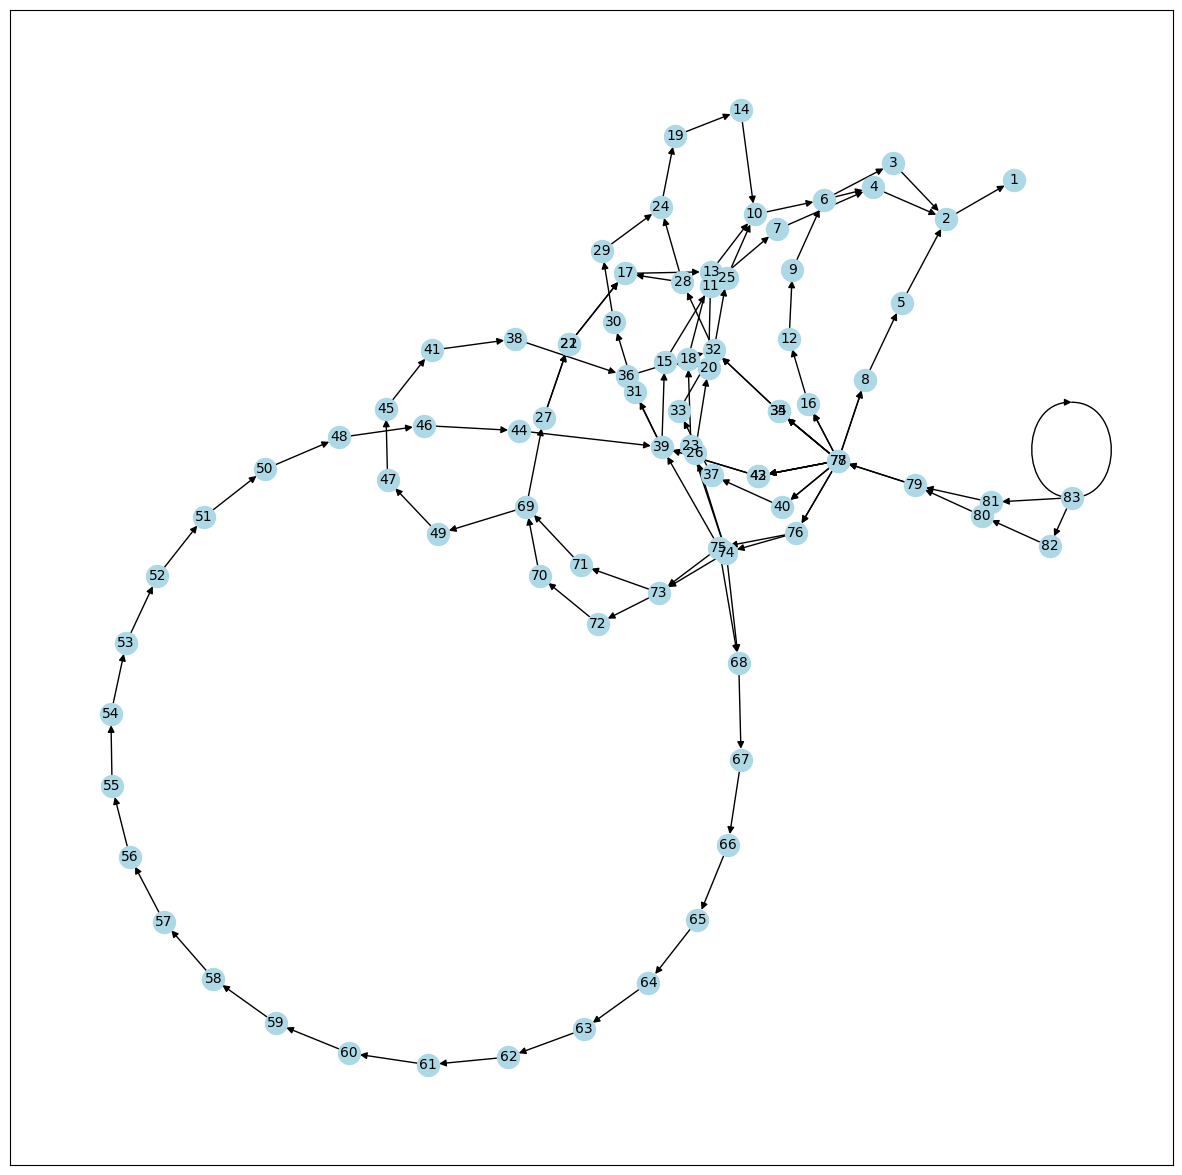

In [23]:
graph_generator(dic_83)

Graph after the algorithm was used:

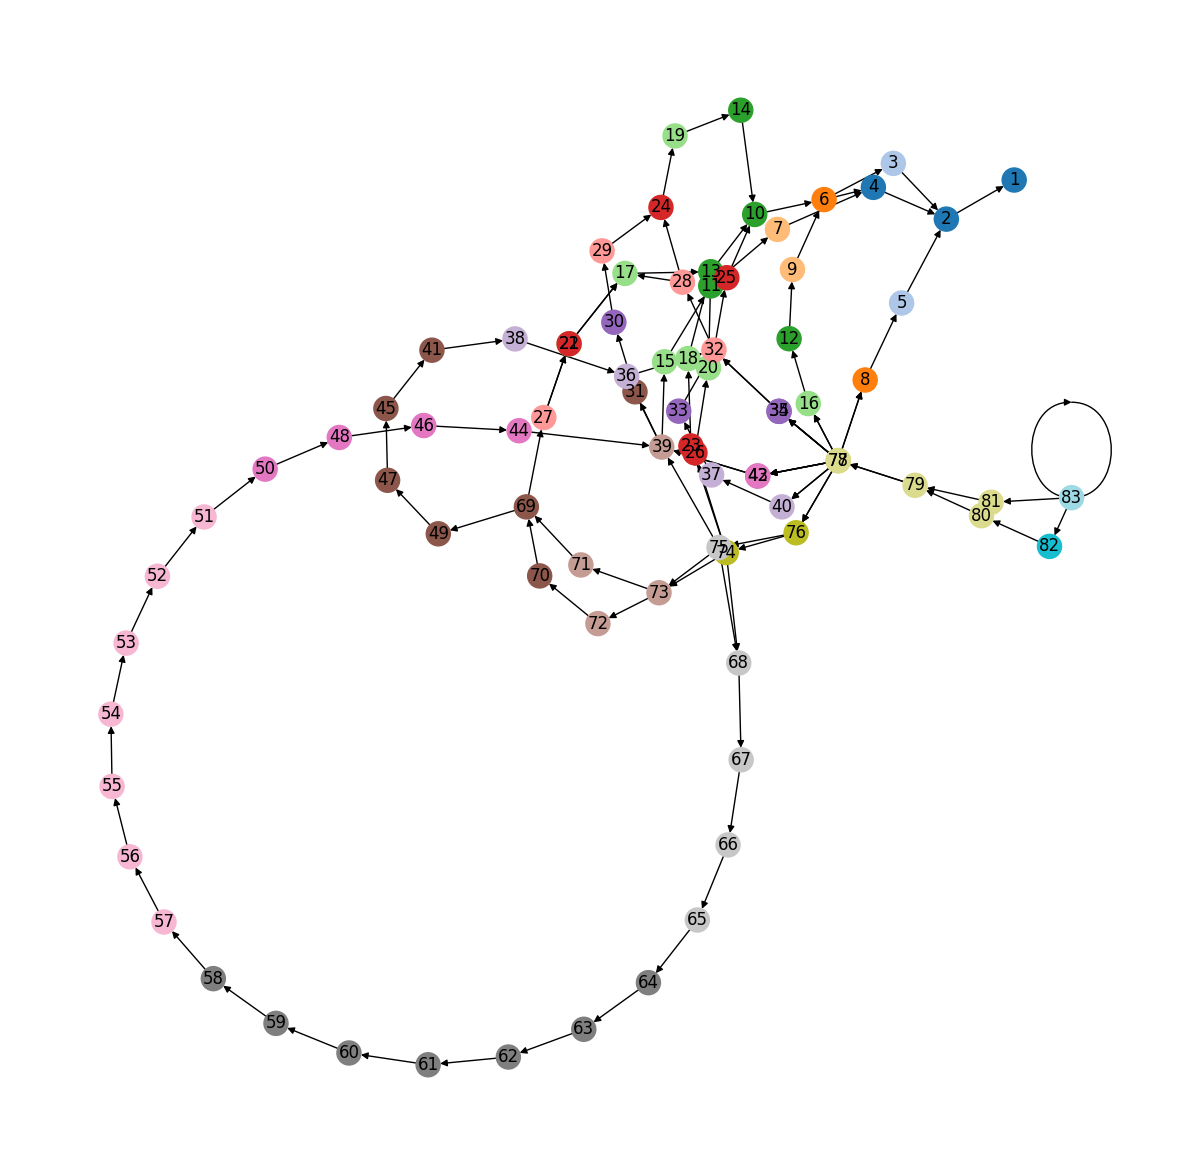

In [21]:
# Create the graph object
G = nx.DiGraph(dic_83)

# Define an Axuliar function to set the node color based on its station assignment 
def get_color(node):
    groups = solution_83
    for i, group in enumerate(groups):
        if node in group:
            return plt.cm.tab20(i)
    return 'gray'

# Get a list of colors for all nodes in the graph
node_colors = [get_color(node) for node in G.nodes]

fig, ax = plt.subplots(figsize=(15, 15))
# Draw the graph with the node colors
nx.draw(G, nx.kamada_kawai_layout(G), with_labels=True, node_color=node_colors, font_color='black')

# Show the plot
plt.show()

Initial graph for the 297 operations problem.

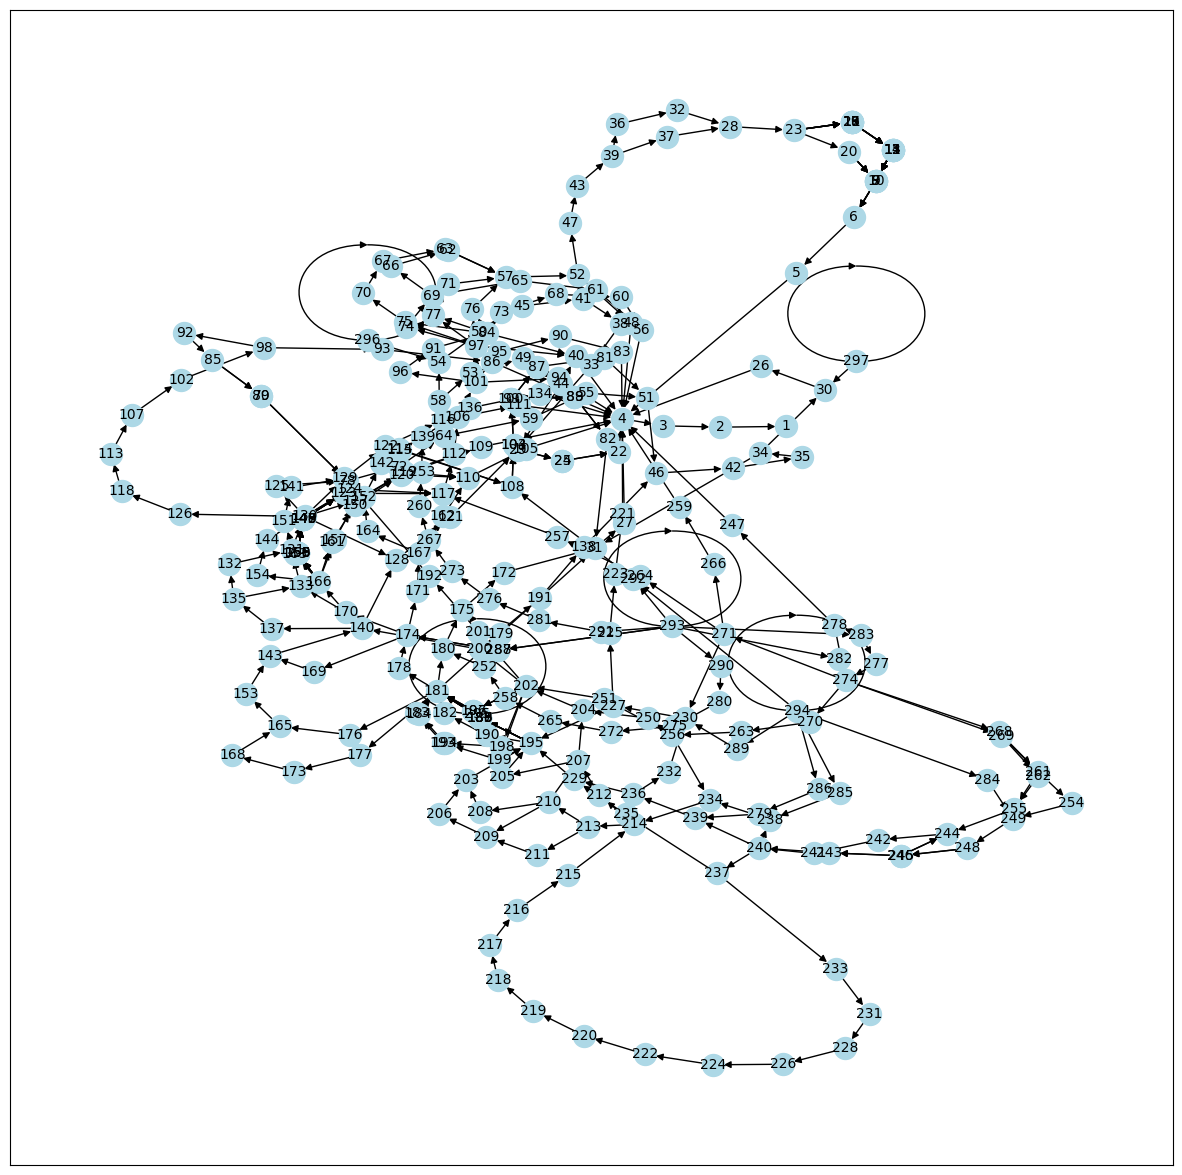

In [31]:
graph_generator(dict_297)

The colors for this next graph are a bit complicated to appreciate as the graph is quite big but in theory they should respect the same color differentiation as before.

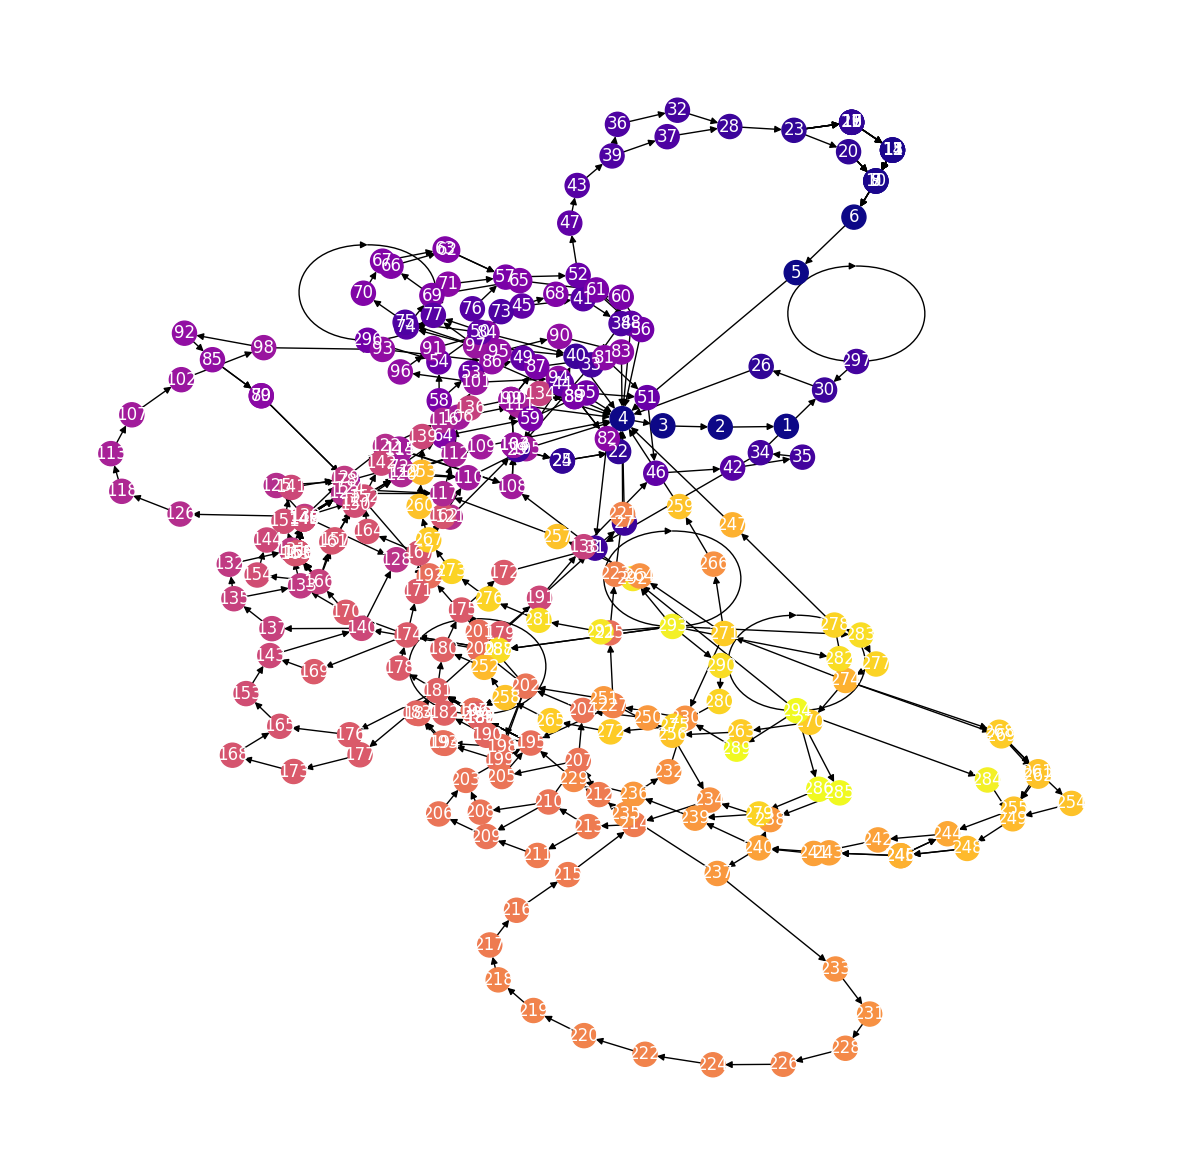

In [24]:
#Creating a graph that contains the solution using different colors per station created
graph = nx.DiGraph(dict_297)
#The groups are the stations generated
groups = solution_297

#create a dictionary mapping nodes to their group number
node_group_dict = {}
for i, group in enumerate(groups):
    for node in group:
        node_group_dict[node] = i

#assign colors to nodes based on their group
node_colors = []
for node in graph.nodes():
    group_number = node_group_dict[node]
    color_value = group_number / (len(groups) - 1)  
    node_color = plt.cm.plasma(color_value)
    node_colors.append(node_color)
    
fig, ax = plt.subplots(figsize=(15, 15))
nx.draw(graph,nx.kamada_kawai_layout(graph), with_labels=True, node_color=node_colors, cmap=plt.cm.plasma, font_color='white')
plt.show()